![Logo](../Img/Poule_qui_chante.png){ width=200px }


# Contexte du Projet

Je travaille au sein d'une entreprise française d'agroalimentaire, qui a décidé de se lancer dans le commerce international. Pour l'instant, aucun pays spécifique ni continent n'a été choisi comme destination. Cette mission consiste à explorer toutes les possibilités offertes par le marché international, sans aucune limitation géographique.

# Objectif du Projet

L'objectif, tel que défini par le manager, est de réaliser une analyse initiale des groupements de pays potentiellement ciblables pour exporter les produits de l'entreprise, en l'occurrence, les poulets. Cette analyse constituera une première étape avant une étude de marché plus approfondie.

## <span style="color:indianred">Partie I - Analyses exploratoires et traitement des données</span> 

### <span style="color:lightseagreen">Importation librairie</span>

In [2]:
suppressWarnings({
  library(data.table)
  library(ggplot2)
  library(FactoMineR)
  library(factoextra)
  library(dplyr)
  library(corrplot)
  library(cluster)
})

### <span style="color:lightseagreen">Importation fichiers</span>


In [2]:
Population <- fread("../Data/Data_5_ans/Population.csv",encoding = "UTF-8")
PIB_Politique_Infras <- fread("../Data/Data_5_ans/PIB_Politique_Infras.csv",encoding = "UTF-8")
Dispo_viande <- fread("../Data/conso_viande_monde.csv",encoding = "UTF-8")
Import_poulet <- fread("../Data/Data_5_ans/Import_Poulet.csv",encoding = "UTF-8")
Taux_de_change <- fread("../Data/Data_5_ans/Taux_de_change.csv",encoding = "UTF-8")
Commerces_détaillées <- fread("../Data/Data_5_ans/Commerce_détaillée.csv",encoding = "UTF-8")
EmissionsCO2 <- fread("../Data/Data_5_ans/Emission_CO2.csv",encoding = "UTF-8")
SPS <- fread("../Data/Data_5_ans/SPS_WTO.csv",encoding = "UTF-8") #source WTO
Barrière_Trade <- fread("../Data/Data_5_ans/Barrières_trade.csv",encoding = "UTF-8") #source WTO
Correspondance <- Correspondance <- fread("../Data/Data_5_ans/Correspondance.csv",encoding = "UTF-8")

# Sources: FAO et WTO

# gérer la taille des visuels dans le notebook
options(repr.plot.width=10, repr.plot.height=10)


J'ai récolté des données des 5 dernières années pour l'ensemble des fichiers. Il est à noter que cette étude n'est pas focalisée sur l'analyse des séries temporelles mais au contraire il se focalise uniquement sur une seule année d'étude pour chaque Zone. Donc ce projet se basera sur la moyenne de ces données dans les chapitres qui vont suivre.

### <span style="color:lightseagreen">Fonctions</span>

In [3]:
analyses_exploratoire <- function(dataset) {
#' Fait passer le dataframe pour sortir les élements d'une analyse exploratoire, comme : Aperçu du fichier, analyses statistiques'
#' vérification des valeurs manquantes et doublons'
    
  # Afficher les informations sur le fichier
  print("Informations sur le fichier:")
    
  print(str(dataset))
  print("--------------------------------------------------------------------")
    
  # Calculer des statistiques descriptives
  print("Statistiques descriptives:")
    
  print(summary(dataset))
  print("--------------------------------------------------------------------")
    
  # Vérifier les valeurs manquantes dans le dataset
  print("Nombres de valeurs manquantes:")  
    
  print(sum(is.na(dataset)))
  print("--------------------------------------------------------------------")
  
  #Compter les doublons
  print("Nombres de doublons:") 
  print(sum(duplicated(dataset)))
  
  #Aperçu des fichiers
  print("Aperçu des fichiers")
  dataset[sample(nrow(dataset), 5), ]
  
}

### <span style="color:lightseagreen">Traitement des fichiers</span>

#### <span style="color:navy">1 - Fichier population</span>

In [4]:
head(Population) 

Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<lgl>
OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,35643.418,X,Ciffre de sources internationales,NA
OA,Séries temporelles annuelles,4,Afghanistan,512,Hommes,3010,Population-Estimations,2017,2017,1000 personnes,18028.696,X,Ciffre de sources internationales,NA
OA,Séries temporelles annuelles,4,Afghanistan,513,Femmes,3010,Population-Estimations,2017,2017,1000 personnes,17614.722,X,Ciffre de sources internationales,NA
OA,Séries temporelles annuelles,4,Afghanistan,551,Population rurale,3010,Population-Estimations,2017,2017,1000 personnes,26558.609,X,Ciffre de sources internationales,NA
OA,Séries temporelles annuelles,4,Afghanistan,561,Population urbaine,3010,Population-Estimations,2017,2017,1000 personnes,8971.472,X,Ciffre de sources internationales,NA
OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,36686.784,X,Ciffre de sources internationales,NA


In [5]:
# Supprimer les colonnes inutiles
Population[ ,c("Code Domaine", "Domaine","Code zone (M49)", "Code Élément", "Code Produit", 
                         "Produit", "Code année", "Description du Symbole", "Symbole", "Note", "Unité") := NULL]

head(Population)


Zone,Élément,Année,Valeur
<chr>,<chr>,<int>,<dbl>
Afghanistan,Population totale,2017,35643.418
Afghanistan,Hommes,2017,18028.696
Afghanistan,Femmes,2017,17614.722
Afghanistan,Population rurale,2017,26558.609
Afghanistan,Population urbaine,2017,8971.472
Afghanistan,Population totale,2018,36686.784


In [6]:
# changer unité population
Population[, Population := Valeur * 1000] #créer nouvelle colonne Population
Population[ ,':='(Valeur = NULL)] #supprimer colonne Valeur,
head(Population)

Zone,Élément,Année,Population
<chr>,<chr>,<int>,<dbl>
Afghanistan,Population totale,2017,35643418
Afghanistan,Hommes,2017,18028696
Afghanistan,Femmes,2017,17614722
Afghanistan,Population rurale,2017,26558609
Afghanistan,Population urbaine,2017,8971472
Afghanistan,Population totale,2018,36686784


In [7]:
#pivoter colonne Elément
#Population: est le nom du data.frame à pivoter.
#Zone et Année: sont les colonnes du data.frame d'origine que vous souhaitez conserver après la pivotisation.
# Élément: est la colonne que l'on souhaite pivoter. 
#value.var: est la variable qui contient les valeurs numériques correspondantes à chaque combinaison de Zone, Année et Élément.
Population <-dcast(Population, Zone + Année ~ Élément, value.var = "Population")
head(Population)

Zone,Année,Femmes,Hommes,Population rurale,Population totale,Population urbaine
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2017,17614722,18028696,26558609,35643418,8971472
Afghanistan,2018,18136922,18549862,27099874,36686784,9273302
Afghanistan,2019,18679089,19090409,27626382,37769499,9582625
Afghanistan,2020,19279930,19692301,28150604,38972230,9904337
Afghanistan,2021,19844584,20254878,28674023,40099462,10239684
Afrique du Sud,2017,29175940,27465269,19369002,56641209,37348154


In [8]:
#moyenne des 5 années d'étude pour chaque pays + suppréssion Année
Population <- Population[ ,':='(Année = NULL)]
Population <- Population[, lapply(.SD, function(x) floor(mean(x))), by = Zone] 
head(Population)
                                  
# lapply() est utilisée pour appliquer une fonction à chaque colonne de Population,
# mean() calcule la moyenne de chaque colonne #floor c'est pour avoir des valeurs sans virgules
# by = Zone indique que les calculs de moyenne doivent être effectués pour chaque zone

Zone,Femmes,Hommes,Population rurale,Population totale,Population urbaine
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,18711049,19123229,27621898,37834278,9594284
Afrique du Sud,29858224,28194191,19236802,58052416,38816773
Albanie,1433803,1436558,1139793,2870362,1798169
Algérie,20937518,21742192,11437591,42679711,31223963
Allemagne,42093613,40987737,18630197,83081350,63765330
Andorre,37531,38853,9255,76385,67834


In [9]:
# changer le nom des colonnes
setnames(Population, c("Zone", "Femmes", "Hommes","Pop_rural","Pop_total","Pop_urbaine"))

In [10]:
analyses_exploratoire(Population)

[1] "Informations sur le fichier:"
Classes 'data.table' and 'data.frame':	236 obs. of  6 variables:
 $ Zone       : chr  "Afghanistan" "Afrique du Sud" "Albanie" "Algérie" ...
 $ Femmes     : num  18711049 29858224 1433803 20937518 42093613 ...
 $ Hommes     : num  19123229 28194191 1436558 21742192 40987737 ...
 $ Pop_rural  : num  27621898 19236802 1139793 11437591 18630197 ...
 $ Pop_total  : num  37834278 58052416 2870362 42679711 83081350 ...
 $ Pop_urbaine: num  9594284 38816773 1798169 31223963 63765330 ...
 - attr(*, "sorted")= chr "Zone"
 - attr(*, ".internal.selfref")=<externalptr> 
NULL
[1] "--------------------------------------------------------------------"
[1] "Statistiques descriptives:"
     Zone               Femmes              Hommes            Pop_rural        
 Length:236         Min.   :      276   Min.   :      254   Min.   :        0  
 Class :character   1st Qu.:   211316   1st Qu.:   211099   1st Qu.:    87655  
 Mode  :character   Median :  2788801   Median 

Zone,Femmes,Hommes,Pop_rural,Pop_total,Pop_urbaine
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mexique,63839854,61088519,25865359,124928374,106435564
Colombie,25344701,24707951,9417159,50052652,40418185
Slovénie,1054010,1056843,940031,2110853,1141359
Nigéria,100667529,102715819,98147781,203383350,102916886
Bahreïn,554483,921335,172436,1475819,1455470


### <span style="color:navy">2 - Fichier sur la stabilité politique, le PIB, les infrastructures...</span>

In [11]:
head(PIB_Politique_Infras)

Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
FS,Données de la sécurité alimentaire,4,Afghanistan,6123,Valeur,21014,Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans),20162018,2016-2018,g/personne/jour,10.7,E,Valeur estimée,NA
FS,Données de la sécurité alimentaire,4,Afghanistan,6123,Valeur,21014,Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans),20172019,2017-2019,g/personne/jour,10.3,E,Valeur estimée,NA
FS,Données de la sécurité alimentaire,4,Afghanistan,6123,Valeur,21014,Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans),20182020,2018-2020,g/personne/jour,,O,Valeur manquante,NA
FS,Données de la sécurité alimentaire,4,Afghanistan,6123,Valeur,21014,Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans),20192021,2019-2021,g/personne/jour,,O,Valeur manquante,NA
FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux constants de 2017)",2017,2017,I$,2058.4,X,Ciffre de sources internationales,NA
FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux constants de 2017)",2018,2018,I$,2033.8,X,Ciffre de sources internationales,NA


In [12]:
# Supprimer les colonnes inutiles
PIB_Politique_Infras[ ,c("Code Domaine", "Domaine","Code zone (M49)", "Code Élément", "Élément","Code Produit", 
                          "Code année", "Unité", "Description du Symbole", "Symbole", "Note") := NULL]

head(PIB_Politique_Infras)


Zone,Produit,Année,Valeur
<chr>,<chr>,<chr>,<chr>
Afghanistan,Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans),2016-2018,10.7
Afghanistan,Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans),2017-2019,10.3
Afghanistan,Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans),2018-2020,
Afghanistan,Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans),2019-2021,
Afghanistan,"PIB par habitant, ($ PPA internationaux constants de 2017)",2017,2058.4
Afghanistan,"PIB par habitant, ($ PPA internationaux constants de 2017)",2018,2033.8


#### <span style="color:maroon">Traitement des intervalles</span>

In [13]:
# Séparer les valeurs d'année en colonnes "début" et "fin"
PIB_Politique_Infras[, c("début", "fin") := tstrsplit(Année, "-", fixed = TRUE)]

# Vérifier si la valeur de l'année est une plage d'années
PIB_Politique_Infras[, intervalle := !is.na(fin)]

# Calculer l'année moyenne pour les plages d'années
PIB_Politique_Infras[intervalle == TRUE, année := (as.integer(début) + as.integer(fin)) / 2]

# Remplacer les plages d'années par l'année moyenne
PIB_Politique_Infras[, Année := ifelse(intervalle == TRUE, année, Année)]

# Supprimer les colonnes inutiles
PIB_Politique_Infras[, c("début", "fin", "intervalle", "année") := NULL]

In [14]:
PIB_Politique_Infras[sample(nrow(PIB_Politique_Infras), 5), ]

Zone,Produit,Année,Valeur
<chr>,<chr>,<chr>,<chr>
Indonésie,Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans),2018,24
Jordanie,Pourcentage de la population ayant accès à des services d'eau potable gérés en toute sécurité,2018,81.4
Espagne,Pourcentage de la population ayant accès à des services d'assainissement gérés en toute sécurité,2017,95.7
Maurice,Pourcentage de la population utilisant au moins les services d'eau de base,2020,99
Togo,Pourcentage de la population ayant accès à des services d'eau potable gérés en toute sécurité,2018,18.8


In [15]:
#pivoter colonne Produit
#PIB_Stabilité_Infras: est le nom du data.frame à pivoter.
#Zone et Année: sont les colonnes du data.frame d'origine que vous souhaitez conserver après la pivotisation.
# Produit: est la colonne que vous souhaitez pivoter. 
#value.var: est la variable qui contient les valeurs numériques correspondantes à chaque combinaison de Zone, Année et Élément.

PIB_Politique_Infras <-dcast(PIB_Politique_Infras, Zone + Année ~ Produit, value.var = "Valeur")
head(PIB_Politique_Infras)

Zone,Année,Besoins énergétiques alimentaires minimaux (kcal/personne/jour),Besoins énergétiques alimentaires moyens (kcal/personne/jour),Densité du réseau ferroviaire (pour 100 km carrés de surface totale du pays),Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans),Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans),Nombre de personnes sous-alimentées (millions) (valeur annuelle),"PIB par habitant, ($ PPA internationaux constants de 2017)",Pourcentage de la population ayant accès à des services d'assainissement gérés en toute sécurité,Pourcentage de la population ayant accès à des services d'eau potable gérés en toute sécurité,Pourcentage de la population utilisant au moins les services d'assainissement de base,Pourcentage de la population utilisant au moins les services d'eau de base,Stabilité politique et absence de violence/terrorisme (indice),Valeur des importations alimentaires par rapport aux exportations totales de marchandises (%) (moyenne sur 3 ans)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Afghanistan,2017,1676,2134,NA,10.7,8.3,NA,2058.4,NA,25.1,45.8,66.8,-2.8,363
Afghanistan,2018,1681,2142,NA,10.3,8.9,NA,2033.8,NA,25.9,47.4,69.6,-2.76,308
Afghanistan,2019,1685,2149,NA,,10.2,NA,2065,NA,26.8,49,72.4,-2.66,281
Afghanistan,2020,1690,2157,NA,,11.6,NA,1970.6,NA,27.6,50.5,75.1,-2.73,
Afghanistan,2021,1695,2164,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afrique du Sud,2017,1859,2406,1.7,35.7,3.1,NA,13860.3,NA,NA,75.8,92.7,-0.28,6


In [16]:
#changer nom des colonnes
#Besoins énergétiques alimentaires minimaux (kcal/personne/jour)
#Besoins énergétiques alimentaires moyens (kcal/personne/jour)
#Densité du réseau ferroviaire (pour 100 km carrés de surface totale du pays) 
#Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)
#Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)
#Nombre de personnes sous-alimentées (millions) (valeur annuelle)
#PIB par habitant, ($ PPA internationaux constants de 2017)
#Pourcentage de la population ayant accès à des services d'assainissement gérés en toute sécurité
#Pourcentage de la population ayant accès à des services d'eau potable gérés en toute sécurité
#Pourcentage de la population utilisant au moins les services d'assainissement de base
#Pourcentage de la population utilisant au moins les services d'eau de base
#Stabilité politique et absence de violence/terrorisme (indice)
#Valeur des importations alimentaires par rapport aux exportations totales de marchandises (%) (moyenne sur 3 ans)
setnames(PIB_Politique_Infras, c("Zone", "Année", "Besoin_Eie_Min", "Besoin_Eie_Moy", "Densité_ferroviaire","Dispo_protéine","Personnes_malnutrition_N","Personnes_malnutrition_V",
              "PIB","Pop_Assainissement_sécu","Pop_eau_sécu","Pop_Assainissement_base","Pop_eau_base","Stabilité_Pol","Import%Export"))

In [17]:
analyses_exploratoire(PIB_Politique_Infras)

[1] "Informations sur le fichier:"
Classes 'data.table' and 'data.frame':	1020 obs. of  15 variables:
 $ Zone                    : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Année                   : chr  "2017" "2018" "2019" "2020" ...
 $ Besoin_Eie_Min          : chr  "1676" "1681" "1685" "1690" ...
 $ Besoin_Eie_Moy          : chr  "2134" "2142" "2149" "2157" ...
 $ Densité_ferroviaire     : chr  NA NA NA NA ...
 $ Dispo_protéine          : chr  "10.7" "10.3" "" "" ...
 $ Personnes_malnutrition_N: chr  "8.3" "8.9" "10.2" "11.6" ...
 $ Personnes_malnutrition_V: chr  NA NA NA NA ...
 $ PIB                     : chr  "2058.4" "2033.8" "2065" "1970.6" ...
 $ Pop_Assainissement_sécu : chr  NA NA NA NA ...
 $ Pop_eau_sécu            : chr  "25.1" "25.9" "26.8" "27.6" ...
 $ Pop_Assainissement_base : chr  "45.8" "47.4" "49" "50.5" ...
 $ Pop_eau_base            : chr  "66.8" "69.6" "72.4" "75.1" ...
 $ Stabilité_Pol           : chr  "-2.8" "-2.76" "-2.66" "-2.73" .

Zone,Année,Besoin_Eie_Min,Besoin_Eie_Moy,Densité_ferroviaire,Dispo_protéine,Personnes_malnutrition_N,Personnes_malnutrition_V,PIB,Pop_Assainissement_sécu,Pop_eau_sécu,Pop_Assainissement_base,Pop_eau_base,Stabilité_Pol,Import%Export
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Portugal,2017,1914,2492,2.8,72,,NA,33044.7,82.8,95.4,99,99,1.12,13
Japon,2021,1860,2418,NA,NA,NA,NA,40769.8,NA,NA,NA,NA,NA,NA
Guyana,2021,1809,2334,NA,NA,NA,NA,22295.5,NA,NA,NA,NA,NA,NA
Bermudes,2020,1916,1916,NA,,,NA,76105.1,NA,NA,99,99,1.01,
Lesotho,2018,1788,2301,NA,18.7,0.6,NA,2614.7,44,26.7,46.5,71.5,-0.18,35


In [18]:
#changement de type en numérique de plusieurs colonnes

PIB_Politique_Infras[, c("Besoin_Eie_Min", "Besoin_Eie_Moy", "Densité_ferroviaire","Dispo_protéine","Personnes_malnutrition_N","Personnes_malnutrition_V",
              "PIB","Pop_Assainissement_sécu","Pop_eau_sécu","Pop_Assainissement_base","Pop_eau_base",
                         "Stabilité_Pol","Import%Export")] <- lapply(PIB_Politique_Infras[, c("Besoin_Eie_Min", "Besoin_Eie_Moy", 
            "Densité_ferroviaire","Dispo_protéine","Personnes_malnutrition_N","Personnes_malnutrition_V",
              "PIB","Pop_Assainissement_sécu","Pop_eau_sécu","Pop_Assainissement_base","Pop_eau_base",
                                        "Stabilité_Pol","Import%Export")], as.numeric, na.rm = TRUE)

str(PIB_Politique_Infras)
head(PIB_Politique_Infras)

Warning message in lapply(PIB_Politique_Infras[, c("Besoin_Eie_Min", "Besoin_Eie_Moy", :
"NAs introduits lors de la conversion automatique"


Classes 'data.table' and 'data.frame':	1020 obs. of  15 variables:
 $ Zone                    : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Année                   : chr  "2017" "2018" "2019" "2020" ...
 $ Besoin_Eie_Min          : num  1676 1681 1685 1690 1695 ...
 $ Besoin_Eie_Moy          : num  2134 2142 2149 2157 2164 ...
 $ Densité_ferroviaire     : num  NA NA NA NA NA 1.7 NA NA NA NA ...
 $ Dispo_protéine          : num  10.7 10.3 NA NA NA 35.7 35 NA NA NA ...
 $ Personnes_malnutrition_N: num  8.3 8.9 10.2 11.6 NA 3.1 3.3 3.7 4.1 NA ...
 $ Personnes_malnutrition_V: num  NA NA NA NA NA NA NA NA NA NA ...
 $ PIB                     : num  2058 2034 2065 1971 NA ...
 $ Pop_Assainissement_sécu : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Pop_eau_sécu            : num  25.1 25.9 26.8 27.6 NA NA NA NA NA NA ...
 $ Pop_Assainissement_base : num  45.8 47.4 49 50.5 NA 75.8 76.7 77.6 78.5 NA ...
 $ Pop_eau_base            : num  66.8 69.6 72.4 75.1 NA 92.7 93.1 93.5

Zone,Année,Besoin_Eie_Min,Besoin_Eie_Moy,Densité_ferroviaire,Dispo_protéine,Personnes_malnutrition_N,Personnes_malnutrition_V,PIB,Pop_Assainissement_sécu,Pop_eau_sécu,Pop_Assainissement_base,Pop_eau_base,Stabilité_Pol,Import%Export
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2017,1676,2134,NA,10.7,8.3,NA,2058.4,NA,25.1,45.8,66.8,-2.80,363
Afghanistan,2018,1681,2142,NA,10.3,8.9,NA,2033.8,NA,25.9,47.4,69.6,-2.76,308
Afghanistan,2019,1685,2149,NA,NA,10.2,NA,2065.0,NA,26.8,49.0,72.4,-2.66,281
Afghanistan,2020,1690,2157,NA,NA,11.6,NA,1970.6,NA,27.6,50.5,75.1,-2.73,NA
Afghanistan,2021,1695,2164,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afrique du Sud,2017,1859,2406,1.7,35.7,3.1,NA,13860.3,NA,NA,75.8,92.7,-0.28,6


In [19]:
# Compter les valeurs manquantes dans chaque colonne
print(colSums(is.na(PIB_Politique_Infras)))

                    Zone                    Année           Besoin_Eie_Min 
                       0                        0                       80 
          Besoin_Eie_Moy      Densité_ferroviaire           Dispo_protéine 
                      80                      875                      688 
Personnes_malnutrition_N Personnes_malnutrition_V                      PIB 
                     637                     1020                       97 
 Pop_Assainissement_sécu             Pop_eau_sécu  Pop_Assainissement_base 
                     547                      539                      261 
            Pop_eau_base            Stabilité_Pol            Import%Export 
                     249                      226                      435 


#### <span style="color:maroon">Traitement des valeurs manquantes</span>

- Méthode: Eliminer les colonnes qui représentent un pourcentage supérieur à 10% des valeurs manquantes, et le reste sera traitée après la jointure

In [20]:
#supprimer les colonnes où il y a trop de valeurs manquantes
PIB_Politique_Infras[ ,c("Densité_ferroviaire", "Personnes_malnutrition_V","Personnes_malnutrition_N","Dispo_protéine") := NULL]
print(colSums(is.na(PIB_Politique_Infras)))

                   Zone                   Année          Besoin_Eie_Min 
                      0                       0                      80 
         Besoin_Eie_Moy                     PIB Pop_Assainissement_sécu 
                     80                      97                     547 
           Pop_eau_sécu Pop_Assainissement_base            Pop_eau_base 
                    539                     261                     249 
          Stabilité_Pol           Import%Export 
                    226                     435 


In [21]:
# Afficher les valeurs nulles dans la colonne _Pop_Assainissement_sécu pour voir la composition (là où il y a le plus valeurs nulles)
PIB_Politique_Infras[is.na(PIB_Politique_Infras$Pop_Assainissement_sécu), ]

Zone,Année,Besoin_Eie_Min,Besoin_Eie_Moy,PIB,Pop_Assainissement_sécu,Pop_eau_sécu,Pop_Assainissement_base,Pop_eau_base,Stabilité_Pol,Import%Export
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2017,1676,2134,2058.4,NA,25.1,45.8,66.8,-2.80,363
Afghanistan,2018,1681,2142,2033.8,NA,25.9,47.4,69.6,-2.76,308
Afghanistan,2019,1685,2149,2065.0,NA,26.8,49.0,72.4,-2.66,281
Afghanistan,2020,1690,2157,1970.6,NA,27.6,50.5,75.1,-2.73,NA
Afghanistan,2021,1695,2164,NA,NA,NA,NA,NA,NA,NA
Afrique du Sud,2017,1859,2406,13860.3,NA,NA,75.8,92.7,-0.28,6
Afrique du Sud,2018,1860,2408,13875.9,NA,NA,76.7,93.1,-0.23,6
Afrique du Sud,2019,1862,2410,13710.0,NA,NA,77.6,93.5,-0.27,6
Afrique du Sud,2020,1864,2412,12665.8,NA,NA,78.5,93.9,-0.24,NA


In [22]:
# Supprimer les lignes avec des valeurs manquantes dans la colonne "%_Pop_Assainissement_sécu"
PIB_Politique_Infras <- PIB_Politique_Infras[!is.na(PIB_Politique_Infras$Pop_Assainissement_sécu), ]
PIB_Politique_Infras 

Zone,Année,Besoin_Eie_Min,Besoin_Eie_Moy,PIB,Pop_Assainissement_sécu,Pop_eau_sécu,Pop_Assainissement_base,Pop_eau_base,Stabilité_Pol,Import%Export
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Albanie,2017,1911,2490,12771.0,47.1,70.6,98.5,94.1,0.38,21
Albanie,2018,1910,2488,13317.1,47.4,70.7,99.0,94.4,0.37,21
Albanie,2019,1909,2487,13653.2,47.6,70.7,99.0,94.8,0.11,23
Albanie,2020,1908,2485,13253.7,47.7,70.7,99.0,95.1,0.08,NA
Algérie,2017,1781,2289,11737.4,18.3,74.6,86.5,93.8,-0.92,23
Algérie,2018,1778,2284,11630.7,18.1,73.9,86.3,94.0,-0.84,22
Algérie,2019,1776,2281,11522.0,17.8,73.1,86.1,94.2,-1.04,25
Algérie,2020,1776,2280,10735.4,17.6,72.4,86.0,94.4,-0.86,NA
Allemagne,2017,1948,2545,53071.5,97.0,99.0,99.0,99.0,0.59,5


In [23]:
# Compter les valeurs manquantes dans chaque colonne
print(colSums(is.na(PIB_Politique_Infras)))

                   Zone                   Année          Besoin_Eie_Min 
                      0                       0                      18 
         Besoin_Eie_Moy                     PIB Pop_Assainissement_sécu 
                     18                      20                       0 
           Pop_eau_sécu Pop_Assainissement_base            Pop_eau_base 
                     86                       0                       4 
          Stabilité_Pol           Import%Export 
                      0                     125 


In [24]:
#moyenne des 5 années d'étude pour chaque pays + suppréssion Année
PIB_Politique_Infras <- PIB_Politique_Infras[ ,':='(Année = NULL)]
PIB_Politique_Infras <- PIB_Politique_Infras[, lapply(.SD, function(x) round(mean(x),2)), by = Zone] 
head(PIB_Politique_Infras)
                                  
# lapply() est utilisée pour appliquer une fonction à chaque colonne de Population,
# mean() calcule la moyenne de chaque colonne. 
# by = Zone indique que les calculs de moyenne doivent être effectués pour chaque zone

Zone,Besoin_Eie_Min,Besoin_Eie_Moy,PIB,Pop_Assainissement_sécu,Pop_eau_sécu,Pop_Assainissement_base,Pop_eau_base,Stabilité_Pol,Import%Export
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Albanie,1909.50,2487.50,13248.75,47.45,70.67,98.88,94.6,0.24,NA
Algérie,1777.75,2283.50,11406.38,17.95,73.50,86.22,94.1,-0.92,NA
Allemagne,1944.50,2539.75,52977.78,97.07,99.00,99.00,99.0,0.60,NA
Andorre,NA,NA,NA,99.00,90.60,99.00,99.0,1.52,NA
Arabie saoudite,1874.00,2423.50,46571.40,57.25,NA,99.00,99.0,-0.63,NA
Arménie,1873.00,2429.75,12775.98,66.95,86.15,93.75,99.0,-0.51,NA


In [25]:
# Compter les valeurs manquantes dans chaque colonne
print(colSums(is.na(PIB_Politique_Infras)))

                   Zone          Besoin_Eie_Min          Besoin_Eie_Moy 
                      0                       5                       5 
                    PIB Pop_Assainissement_sécu            Pop_eau_sécu 
                      5                       0                      22 
Pop_Assainissement_base            Pop_eau_base           Stabilité_Pol 
                      0                       1                       0 
          Import%Export 
                    116 


In [26]:
#nombre de lignes restants
nrow(PIB_Politique_Infras)

[1] 120

In [27]:
# Afficher les valeurs manquantes
PIB_Politique_Infras[apply(is.na(PIB_Politique_Infras), 1, any)]

Zone,Besoin_Eie_Min,Besoin_Eie_Moy,PIB,Pop_Assainissement_sécu,Pop_eau_sécu,Pop_Assainissement_base,Pop_eau_base,Stabilité_Pol,Import%Export
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Albanie,1909.50,2487.50,13248.75,47.45,70.67,98.88,94.60,0.24,NA
Algérie,1777.75,2283.50,11406.38,17.95,73.50,86.22,94.10,-0.92,NA
Allemagne,1944.50,2539.75,52977.78,97.07,99.00,99.00,99.00,0.60,NA
Andorre,NA,NA,NA,99.00,90.60,99.00,99.00,1.52,NA
Arabie saoudite,1874.00,2423.50,46571.40,57.25,NA,99.00,99.00,-0.63,NA
Arménie,1873.00,2429.75,12775.98,66.95,86.15,93.75,99.00,-0.51,NA
Australie,1908.75,2482.50,48853.85,72.83,NA,99.00,99.00,0.91,NA
Autriche,1942.50,2536.00,54280.68,99.00,98.90,99.00,99.00,0.93,NA
Bahreïn,1954.75,2541.25,45236.30,90.30,99.00,99.00,99.00,-0.76,NA


In [28]:
# Afficher les valeurs nulles dans la colonne où il y a plus de valeurs unique pour voir la composition
PIB_Politique_Infras[is.na(PIB_Politique_Infras$Pop_eau_sécu), ]
#supprimer la colonne %import_export puisque supérieur à 10%
PIB_Politique_Infras[ ,c("Import%Export", "Pop_eau_sécu") := NULL]
print(colSums(is.na(PIB_Politique_Infras)))

Zone,Besoin_Eie_Min,Besoin_Eie_Moy,PIB,Pop_Assainissement_sécu,Pop_eau_sécu,Pop_Assainissement_base,Pop_eau_base,Stabilité_Pol,Import%Export
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Arabie saoudite,1874.00,2423.50,46571.40,57.25,NA,99.00,99.00,-0.63,NA
Australie,1908.75,2482.50,48853.85,72.83,NA,99.00,99.00,0.91,NA
Bolivie (État plurinational de),1759.50,2262.25,8414.20,50.67,NA,63.00,92.55,-0.44,NA
Croatie,1910.75,2487.75,27939.88,69.75,NA,96.55,NA,0.70,NA
Cuba,1882.25,2442.75,NA,36.83,NA,91.03,96.65,0.62,NA
Djibouti,1865.50,2412.75,5117.52,36.42,NA,65.65,75.95,-0.39,NA
Honduras,1776.50,2286.75,5529.25,49.12,NA,82.35,94.95,-0.55,NA
Inde,1794.50,2312.50,6393.23,42.90,NA,66.88,89.80,-0.84,NA
Libye,1848.50,2384.00,21664.97,21.60,NA,92.10,99.00,-2.46,NA


                   Zone          Besoin_Eie_Min          Besoin_Eie_Moy 
                      0                       5                       5 
                    PIB Pop_Assainissement_sécu Pop_Assainissement_base 
                      5                       0                       0 
           Pop_eau_base           Stabilité_Pol 
                      1                       0 


#### <span style="color:navy">3 - Fichier disponibilité viande dans le monde</span>

In [29]:
head(Dispo_viande)

Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
SCL,Compte Disponibilités et Utilisations (CDU) (2010-),4,Afghanistan,5510,Production,21185,"Extraits de jus de viande, de poissons ou de crustacés, de mollusques ou d’autres invertébrés aquatiques",2010,2010,tonnes,0,I,Valeur imputée
SCL,Compte Disponibilités et Utilisations (CDU) (2010-),4,Afghanistan,5510,Production,21185,"Extraits de jus de viande, de poissons ou de crustacés, de mollusques ou d’autres invertébrés aquatiques",2011,2011,tonnes,0,I,Valeur imputée
SCL,Compte Disponibilités et Utilisations (CDU) (2010-),4,Afghanistan,5510,Production,21185,"Extraits de jus de viande, de poissons ou de crustacés, de mollusques ou d’autres invertébrés aquatiques",2012,2012,tonnes,0,I,Valeur imputée
SCL,Compte Disponibilités et Utilisations (CDU) (2010-),4,Afghanistan,5510,Production,21185,"Extraits de jus de viande, de poissons ou de crustacés, de mollusques ou d’autres invertébrés aquatiques",2013,2013,tonnes,0,I,Valeur imputée
SCL,Compte Disponibilités et Utilisations (CDU) (2010-),4,Afghanistan,5610,Importations - Quantité,21185,"Extraits de jus de viande, de poissons ou de crustacés, de mollusques ou d’autres invertébrés aquatiques",2015,2015,tonnes,1,T,Chiffre non officiel
SCL,Compte Disponibilités et Utilisations (CDU) (2010-),4,Afghanistan,5610,Importations - Quantité,21185,"Extraits de jus de viande, de poissons ou de crustacés, de mollusques ou d’autres invertébrés aquatiques",2016,2016,tonnes,0,T,Chiffre non officiel


In [30]:
# Supprimer les colonnes inutiles
Dispo_viande[ ,c("Code Domaine", "Domaine","Code zone (M49)", "Code Élément", "Code Produit (CPC)", 
                          "Code année", "Description du Symbole", "Symbole") := NULL]

head(Dispo_viande)

Zone,Élément,Produit,Année,Unité,Valeur
<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
Afghanistan,Production,"Extraits de jus de viande, de poissons ou de crustacés, de mollusques ou d’autres invertébrés aquatiques",2010,tonnes,0
Afghanistan,Production,"Extraits de jus de viande, de poissons ou de crustacés, de mollusques ou d’autres invertébrés aquatiques",2011,tonnes,0
Afghanistan,Production,"Extraits de jus de viande, de poissons ou de crustacés, de mollusques ou d’autres invertébrés aquatiques",2012,tonnes,0
Afghanistan,Production,"Extraits de jus de viande, de poissons ou de crustacés, de mollusques ou d’autres invertébrés aquatiques",2013,tonnes,0
Afghanistan,Importations - Quantité,"Extraits de jus de viande, de poissons ou de crustacés, de mollusques ou d’autres invertébrés aquatiques",2015,tonnes,1
Afghanistan,Importations - Quantité,"Extraits de jus de viande, de poissons ou de crustacés, de mollusques ou d’autres invertébrés aquatiques",2016,tonnes,0


In [31]:
#pivoter colonne Produit
#Conso_viande_monde: est le nom du data.frame à pivoter.
#Zone et Année: sont les colonnes du data.frame d'origine que vous souhaitez conserver après la pivotisation.
# Produit: est la colonne que vous souhaitez pivoter. 
#value.var: est la variable qui contient les valeurs numériques correspondantes à chaque combinaison de Zone, Année et Élément.

Dispo_viande <-dcast(Dispo_viande, Zone + Année + Élément ~ Produit, value.var = "Valeur")
head(Dispo_viande)

Zone,Année,Élément,"Extraits de jus de viande, de poissons ou de crustacés, de mollusques ou d’autres invertébrés aquatiques","Saucisses et produits similaires, de viande, d’abats ou de sang de bœuf et de veau","Viande, boeuf séchée, salée, fumée","Viande, bovin, désossée, fraîche ou réfrigérée","Viande, bovine, fraîche ou réfrigérée","Viande, buffle, fraîche ou réfrigérée","Viande, canard, fraîche ou réfrigérée","Viande, dinde, fraîche ou réfrigérée","Viande, oie, fraîche ou réfrigérée","Viande, pigeons et autres volatiles n.a.c., fraîche, réfrigérée ou congelée","Viande, poulet, fraîche ou réfrigérée"
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2010,Disponibilité alimentaire (Kcal/personne/jour),NA,NA,NA,NA,27,0,NA,NA,NA,NA,8
Afghanistan,2010,Disponibilité alimentaire en quantité (g/personne/jour),NA,NA,NA,NA,12,0,NA,NA,NA,NA,6
Afghanistan,2010,Disponibilité alimentaire en quantité (tonnes),NA,NA,NA,NA,132992,578,NA,NA,NA,NA,64538
Afghanistan,2010,Importations - Quantité,NA,NA,NA,NA,1992,405,NA,NA,NA,NA,38591
Afghanistan,2010,Production,0,0,0,0,131000,NA,NA,NA,NA,NA,28000
Afghanistan,2010,Variation de stock,NA,NA,NA,NA,0,-173,NA,NA,NA,NA,2053


In [32]:
#voir la liste des éléments uniques dans la colonne Année
unique(Dispo_viande$Année)

[1] 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020

In [33]:
#supprimer les années avant 2016 
Dispo_viande <- subset(Dispo_viande, Année < 2010 | Année > 2015)

#changer le nom des colonnes
setnames(Dispo_viande, c("Zone", "Année", "Élément","Extraits_poissons","Saucisses","Boeuf_séché","Bovin_sans_Os","Bovine",
              "Buffle","Canard","Dinde","Oie","Pigeons","Poulet_Monde"))


In [34]:
#voir la liste des éléments uniques dans la colonne éléments
unique(Dispo_viande$Élément)

[1] "Disponibilité alimentaire (Kcal/personne/jour)"         
[2] "Disponibilité alimentaire en quantité (g/personne/jour)"
[3] "Disponibilité alimentaire en quantité (tonnes)"         
[4] "Importations - Quantité"                                
[5] "Production"                                             
[6] "Variation de stock"                                     
[7] "Exportations - Quantité"

In [35]:
#Dans ces données, je vais garder que la disponibilité alimentaire en tonnes qui revient à la formule :
#Dispo = production + variation de stock + Importation - Importation

Dispo_viande <- subset(Dispo_viande, Élément == "Disponibilité alimentaire en quantité (tonnes)")

#supprimer les colonnes inutiles
Dispo_viande[, "Élément" := NULL]

Dispo_viande[sample(nrow(Dispo_viande), 5), ]

Zone,Année,Extraits_poissons,Saucisses,Boeuf_séché,Bovin_sans_Os,Bovine,Buffle,Canard,Dinde,Oie,Pigeons,Poulet_Monde
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Équateur,2017,0.00,NA,0.00,77.00,217968.00,NA,507,1547.00,71.00,NA,338000.00
Saint-Vincent-et-les Grenadines,2019,NA,415.78,16.36,104.30,221.53,NA,NA,1006.32,3.09,NA,7421.95
Bosnie-Herzégovine,2019,1.16,NA,0.00,2418.52,42943.48,NA,0,1304.77,NA,NA,67716.50
Honduras,2016,0.00,NA,8.00,43822.00,11131.00,NA,0,433.00,NA,0,198165.00
République de Moldova,2018,0.00,NA,56.00,822.00,4224.00,NA,0,3927.00,3.00,NA,70783.00


In [36]:
analyses_exploratoire(Dispo_viande)

[1] "Informations sur le fichier:"
Classes 'data.table' and 'data.frame':	912 obs. of  13 variables:
 $ Zone             : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Année            : int  2016 2017 2018 2019 2020 2016 2017 2018 2019 2020 ...
 $ Extraits_poissons: num  0 0 0 1.46 NA ...
 $ Saucisses        : num  1057 856 173 157 76.7 ...
 $ Boeuf_séché      : num  0 0 15 0.35 0.7 ...
 $ Bovin_sans_Os    : num  529 527 747 998 1255 ...
 $ Bovine           : num  110288 100935 95538 101713 123147 ...
 $ Buffle           : num  895 735 683 760 735 ...
 $ Canard           : num  30 51 159 162 178 ...
 $ Dinde            : num  825 179 204 182 111 ...
 $ Oie              : num  NA NA NA 0.03 0.48 ...
 $ Pigeons          : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Poulet_Monde     : num  67968 63514 52832 67725 66026 ...
 - attr(*, ".internal.selfref")=<externalptr> 
 - attr(*, "sorted")= chr  "Zone" "Année"
NULL
[1] "-----------------------------------------------

Zone,Année,Extraits_poissons,Saucisses,Boeuf_séché,Bovin_sans_Os,Bovine,Buffle,Canard,Dinde,Oie,Pigeons,Poulet_Monde
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Viet Nam,2017,0.00,NA,NA,30574,322506,87959.0,87163,1696.00,1,NA,838892
Chine,2020,4068.82,NA,2103.35,2091264,6350730,672731.7,3478678,33894.53,2720110,19.05,16685369
République-Unie de Tanzanie,2017,251.00,NA,0.00,0,381504,NA,1386,724.00,NA,NA,65865
Chine,2017,3404.00,0,473.00,799897,5829697,635072.0,3040237,13887.00,2511433,63.00,14777535
Italie,2017,0.00,NA,486.00,45408,877975,34830.0,1685,270200.00,273,13.00,857095


#### <span style="color:maroon ">Traitement des valeurs manquantes</span>

In [37]:
#nombre de valeurs manquantes
print(colSums(is.na(Dispo_viande)))

             Zone             Année Extraits_poissons         Saucisses 
                0                 0               142               659 
      Boeuf_séché     Bovin_sans_Os            Bovine            Buffle 
               76                 7               110               665 
           Canard             Dinde               Oie           Pigeons 
               42                20               370               691 
     Poulet_Monde 
                0 


Au total, nous avons 912 lignes, donc on va supprimer les colonnes comme "Poissons","Pigeons", "Buffles", "Saucisses", "Oie" dans un premier temps.

In [38]:
# Supprimer colonnes inutiles
Dispo_viande[ ,c("Saucisses", "Extraits_poissons", "Buffle", "Oie", "Pigeons") := NULL]


In [39]:
#moyenne des 5 années d'étude pour chaque pays + suppréssion Année
Dispo_viande <- Dispo_viande[ ,':='(Année = NULL)]
Dispo_viande <- Dispo_viande[, lapply(.SD, function(x) round(mean(x),2)), by = Zone] 
head(Dispo_viande)
                                  
# lapply() est utilisée pour appliquer une fonction à chaque colonne de Population,
# mean() calcule la moyenne de chaque colonne. 
# by = Zone indique que les calculs de moyenne doivent être effectués pour chaque zone

Zone,Boeuf_séché,Bovin_sans_Os,Bovine,Canard,Dinde,Poulet_Monde
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,3.21,811.19,106324.21,116.06,300.20,63613.05
Afrique du Sud,125.71,3025.20,1016116.17,979.41,29924.51,2081894.66
Albanie,5.29,513.53,37339.67,4.57,731.41,32180.28
Algérie,0.00,36693.78,157636.20,NA,21313.79,263055.24
Allemagne,585.60,827956.00,NA,58656.24,485397.02,919105.15
Angola,2610.30,6325.11,104101.07,446.26,9567.01,296848.66


In [40]:
#nombre de lignes restants;
nrow(Dispo_viande)

[1] 186

In [41]:
#nombre de valeurs manquantes
print(colSums(is.na(Dispo_viande)))

# Afficher les valeurs nulles dans la colonne où il y a plus de valeurs unique pour voir la composition
Dispo_viande[is.na(Dispo_viande$"Boeuf_séché"), ]

         Zone   Boeuf_séché Bovin_sans_Os        Bovine        Canard 
            0            25             2            25            17 
        Dinde  Poulet_Monde 
            5             0 


Zone,Boeuf_séché,Bovin_sans_Os,Bovine,Canard,Dinde,Poulet_Monde
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Bangladesh,NA,122.98,193580.51,56604.20,4.08,204127.41
Bhoutan,NA,5.69,6520.37,3.23,292.69,3052.97
Comores,NA,868.82,1366.65,22.95,65.83,12453.43
Cuba,NA,1414.34,74464.21,0.97,2120.63,329120.30
Guinée-Bissau,NA,12.65,7434.78,1.06,65.24,4691.45
Islande,NA,720.63,3981.03,64.27,154.23,9612.26
Israël,NA,87577.76,141852.90,2002.68,89593.20,485265.30
Jordanie,NA,31887.91,22654.63,126.73,5043.44,247409.85
Kenya,NA,56.20,431510.39,0.84,7.80,87705.85


- Pour garder le maximum de pays pour étudier le poulet, je préfère supprimer les colonnes comme le boeuf ou le canard dans notre étude (supérieur à 10%)

In [42]:
# Supprimer colonnes non pertinentes
Dispo_viande[ ,c("Boeuf_séché", "Bovine", "Canard") := NULL]

#nombre de valeurs manquantes
print(colSums(is.na(Dispo_viande)))

# Afficher les valeurs nulles dans la colonne où il y a plus de valeurs unique pour voir la composition
Dispo_viande[is.na(Dispo_viande$"Dinde"), ]

         Zone Bovin_sans_Os         Dinde  Poulet_Monde 
            0             2             5             0 


Zone,Bovin_sans_Os,Dinde,Poulet_Monde
<chr>,<dbl>,<dbl>,<dbl>
Indonésie,133910.25,NA,2734504.43
Mongolie,8922.68,NA,9669.74
Pakistan,3994.16,NA,1168552.80
République populaire démocratique de Corée,274.02,NA,31265.07
Venezuela (République bolivarienne du),322447.25,NA,506836.21


In [43]:
#changer le nom des colonnes
setnames(Dispo_viande, c("Zone", "Dispo_Bovin", "Dispo_Dinde","Dispo_Poulet"))

### <span style="color:navy">4 - Fichier importation poulet</span>

In [44]:
head(Import_poulet)

Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
TCL,Cultures et produits animaux,4,Afghanistan,5610,Importations - Quantité,21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,tonnes,28937.00,A,Chiffre officiel
TCL,Cultures et produits animaux,4,Afghanistan,5610,Importations - Quantité,21121,"Viande, poulet, fraîche ou réfrigérée",2018,2018,tonnes,23913.00,A,Chiffre officiel
TCL,Cultures et produits animaux,4,Afghanistan,5610,Importations - Quantité,21121,"Viande, poulet, fraîche ou réfrigérée",2019,2019,tonnes,14671.92,A,Chiffre officiel
TCL,Cultures et produits animaux,4,Afghanistan,5610,Importations - Quantité,21121,"Viande, poulet, fraîche ou réfrigérée",2020,2020,tonnes,35617.07,T,Chiffre non officiel
TCL,Cultures et produits animaux,4,Afghanistan,5610,Importations - Quantité,21121,"Viande, poulet, fraîche ou réfrigérée",2021,2021,tonnes,32613.38,T,Chiffre non officiel
TCL,Cultures et produits animaux,4,Afghanistan,5622,Importations - Valeur,21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,1000 US$,28934.00,A,Chiffre officiel


In [45]:
# Supprimer colonnes inutiles
Import_poulet[ ,c("Code Domaine", "Domaine", "Code zone (M49)", "Code Élément", "Produit",
                         "Code Produit (CPC)", "Code année", "Description du Symbole", "Symbole","Unité") := NULL]

                     
head(Import_poulet)

Zone,Élément,Année,Valeur
<chr>,<chr>,<int>,<dbl>
Afghanistan,Importations - Quantité,2017,28937.00
Afghanistan,Importations - Quantité,2018,23913.00
Afghanistan,Importations - Quantité,2019,14671.92
Afghanistan,Importations - Quantité,2020,35617.07
Afghanistan,Importations - Quantité,2021,32613.38
Afghanistan,Importations - Valeur,2017,28934.00


In [46]:
#pivoter colonne Produit

Import_poulet <-dcast(Import_poulet, Zone + Année ~ Élément, value.var = "Valeur")
head(Import_poulet)

Zone,Année,Importations - Quantité,Importations - Valeur
<chr>,<int>,<dbl>,<dbl>
Afghanistan,2017,28937.00,28934
Afghanistan,2018,23913.00,20665
Afghanistan,2019,14671.92,13693
Afghanistan,2020,35617.07,40590
Afghanistan,2021,32613.38,46139
Afrique du Sud,2017,480345.55,410502


In [47]:
analyses_exploratoire(Import_poulet)

[1] "Informations sur le fichier:"
Classes 'data.table' and 'data.frame':	957 obs. of  4 variables:
 $ Zone                   : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Année                  : int  2017 2018 2019 2020 2021 2017 2018 2019 2020 2021 ...
 $ Importations - Quantité: num  28937 23913 14672 35617 32613 ...
 $ Importations - Valeur  : num  28934 20665 13693 40590 46139 ...
 - attr(*, ".internal.selfref")=<externalptr> 
 - attr(*, "sorted")= chr  "Zone" "Année"
NULL
[1] "--------------------------------------------------------------------"
[1] "Statistiques descriptives:"
     Zone               Année      Importations - Quantité
 Length:957         Min.   :2017   Min.   :      0        
 Class :character   1st Qu.:2018   1st Qu.:   2059        
 Mode  :character   Median :2019   Median :  13139        
                    Mean   :2019   Mean   :  77027        
                    3rd Qu.:2020   3rd Qu.:  55619        
                    Max.   :20

Zone,Année,Importations - Quantité,Importations - Valeur
<chr>,<int>,<dbl>,<dbl>
Soudan,2019,231.00,345
France,2019,386982.33,1034166
Autriche,2021,48124.41,166682
Suède,2017,52918.15,172875
République démocratique populaire lao,2021,114.11,126


In [48]:
#changer le nom des colonnes
setnames(Import_poulet, c("Zone", "Année", "Importation_Qté","Importation_Val"))

In [49]:
#moyenne des 5 années d'étude pour chaque pays + suppréssion Année
Import_poulet <- Import_poulet[ ,':='(Année = NULL)]
Import_poulet <- Import_poulet[, lapply(.SD, function(x) round(mean(x),2)), by = Zone] 
head(Import_poulet)
                                  
# lapply() est utilisée pour appliquer une fonction à chaque colonne de Population,
# mean() calcule la moyenne de chaque colonne. 
# by = Zone indique que les calculs de moyenne doivent être effectués pour chaque zone

Zone,Importation_Qté,Importation_Val
<chr>,<dbl>,<dbl>
Afghanistan,27150.47,30004.2
Afrique du Sud,434300.01,342601.6
Albanie,23050.38,25427.2
Algérie,5.62,6.6
Allemagne,482983.66,1192031.4
Angola,259459.70,269749.6


In [50]:
#nombre de valeurs manquantes
print(colSums(is.na(Import_poulet)))

           Zone Importation_Qté Importation_Val 
              0               0               0 


In [51]:
# convertir les unités en valeurs (1000$US)
Import_poulet[, Importation_Valeur := Importation_Val * 1000] #créer nouvelle colonne  
Import_poulet[ ,"Importation_Val" := NULL]#supprimer colonne inutiles
head(Import_poulet)

Zone,Importation_Qté,Importation_Valeur
<chr>,<dbl>,<dbl>
Afghanistan,27150.47,30004200
Afrique du Sud,434300.01,342601600
Albanie,23050.38,25427200
Algérie,5.62,6600
Allemagne,482983.66,1192031400
Angola,259459.70,269749600


### <span style="color:navy">5-  Fichier taux de change </span> 

In [52]:
head(Taux_de_change)

Code Domaine,Domaine,Code zone (M49),Zone,Code de devise ISO (FAO),Devise,Code Élément,Élément,Code année,Année,Code Mois,Mois,Unité,Valeur,Symbole,Description du Symbole
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<lgl>,<dbl>,<chr>,<chr>
PE,Taux de change,4,Afghanistan,AFN,Afghani,SLC,Unités de monnaie locale standardisée par USD,2018,2018,7021,Valeur annuel,NA,72.08325,X,Ciffre de sources internationales
PE,Taux de change,4,Afghanistan,AFN,Afghani,SLC,Unités de monnaie locale standardisée par USD,2019,2019,7021,Valeur annuel,NA,77.73795,X,Ciffre de sources internationales
PE,Taux de change,4,Afghanistan,AFN,Afghani,SLC,Unités de monnaie locale standardisée par USD,2020,2020,7021,Valeur annuel,NA,76.81354,X,Ciffre de sources internationales
PE,Taux de change,4,Afghanistan,AFN,Afghani,SLC,Unités de monnaie locale standardisée par USD,2021,2021,7021,Valeur annuel,NA,82.52611,X,Ciffre de sources internationales
PE,Taux de change,8,Albanie,ALL,Lek,SLC,Unités de monnaie locale standardisée par USD,2018,2018,7021,Valeur annuel,NA,107.98917,X,Ciffre de sources internationales
PE,Taux de change,8,Albanie,ALL,Lek,SLC,Unités de monnaie locale standardisée par USD,2019,2019,7021,Valeur annuel,NA,109.85083,X,Ciffre de sources internationales


In [53]:
# Supprimer colonnes inutiles
Taux_de_change[ ,c("Code Domaine", "Domaine", "Code zone (M49)", "Code Élément", "Code de devise ISO (FAO)",
                         "Élément", "Code année", "Description du Symbole", "Symbole","Unité","Mois","Code Mois") := NULL]

                     
head(Taux_de_change) 
# Les valeurs sont en unités de monnaie locale standardisée par USD

Zone,Devise,Année,Valeur
<chr>,<chr>,<int>,<dbl>
Afghanistan,Afghani,2018,72.08325
Afghanistan,Afghani,2019,77.73795
Afghanistan,Afghani,2020,76.81354
Afghanistan,Afghani,2021,82.52611
Albanie,Lek,2018,107.98917
Albanie,Lek,2019,109.85083


In [54]:
setnames(Taux_de_change, c("Zone", "Devise", "Année","Taux_de_change"))

In [55]:
analyses_exploratoire(Taux_de_change)

[1] "Informations sur le fichier:"
Classes 'data.table' and 'data.frame':	687 obs. of  4 variables:
 $ Zone          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Devise        : chr  "Afghani" "Afghani" "Afghani" "Afghani" ...
 $ Année         : int  2018 2019 2020 2021 2018 2019 2020 2021 2022 2018 ...
 $ Taux_de_change: num  72.1 77.7 76.8 82.5 108 ...
 - attr(*, ".internal.selfref")=<externalptr> 
NULL
[1] "--------------------------------------------------------------------"
[1] "Statistiques descriptives:"
     Zone              Devise              Année      Taux_de_change     
 Length:687         Length:687         Min.   :2018   Min.   :     0.00  
 Class :character   Class :character   1st Qu.:2019   1st Qu.:     3.28  
 Mode  :character   Mode  :character   Median :2020   Median :    20.27  
                                       Mean   :2020   Mean   :  1225.93  
                                       3rd Qu.:2021   3rd Qu.:   208.50  
              

Zone,Devise,Année,Taux_de_change
<chr>,<chr>,<int>,<dbl>
Djibouti,Djibouti Franc,2020,177.7200000
Paraguay,Guarani,2022,6982.7523780
Guinée,Guinea Franc,2021,9795.7058330
Îles d'Åland,Euro,2022,0.9509155
Maurice,Mauritius Rupee,2021,41.6921333


In [56]:
#moyenne des 5 années d'étude pour chaque pays + suppréssion Année
Taux_de_change <- Taux_de_change[ ,c("Devise", "Année") := NULL]
Taux_de_change <- Taux_de_change[, lapply(.SD, function(x) round(mean(x),2)), by = Zone] 
head(Taux_de_change)

#nombre de valeurs manquantes
print(colSums(is.na(Taux_de_change)))
                                  
# lapply() est utilisée pour appliquer une fonction à chaque colonne de Taux_de_change,
# mean() calcule la moyenne de chaque colonne. 
# by = Zone indique que les calculs de moyenne doivent être effectués pour chaque zone

Zone,Taux_de_change
<chr>,<dbl>
Afghanistan,77.29
Albanie,108.61
Algérie,127.96
Angola,457.59
Argentine,74.48
Arménie,478.38


          Zone Taux_de_change 
             0              0 


### <span style="color:navy">6- Fichier Emissions C02</span>

In [57]:
head(EmissionsCO2)

Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>
EI,Intensités des émissions,4,Afghanistan,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2016,2016,tonnes,24298,I,Valeur imputée
EI,Intensités des émissions,4,Afghanistan,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,tonnes,27694,I,Valeur imputée
EI,Intensités des émissions,4,Afghanistan,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2018,2018,tonnes,29336,I,Valeur imputée
EI,Intensités des émissions,4,Afghanistan,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2019,2019,tonnes,28033,I,Valeur imputée
EI,Intensités des émissions,4,Afghanistan,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2020,2020,tonnes,27938,I,Valeur imputée
EI,Intensités des émissions,710,Afrique du Sud,5510,Production,21121,"Viande, poulet, fraîche ou réfrigérée",2016,2016,tonnes,1677838,A,Chiffre officiel


In [58]:
# Supprimer colonnes inutiles
EmissionsCO2[ ,c("Code Domaine", "Domaine", "Code zone (M49)", "Code Élément", "Produit",
                         "Code Produit (CPC)", "Code année", "Description du Symbole", "Symbole","Unité", "Élément") := NULL]

                     
head(EmissionsCO2)

Zone,Année,Valeur
<chr>,<int>,<int>
Afghanistan,2016,24298
Afghanistan,2017,27694
Afghanistan,2018,29336
Afghanistan,2019,28033
Afghanistan,2020,27938
Afrique du Sud,2016,1677838


In [59]:
setnames(EmissionsCO2, c("Zone", "Année", "EmissionsCO2"))

In [60]:
analyses_exploratoire(EmissionsCO2)

[1] "Informations sur le fichier:"
Classes 'data.table' and 'data.frame':	974 obs. of  3 variables:
 $ Zone        : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Année       : int  2016 2017 2018 2019 2020 2016 2017 2018 2019 2020 ...
 $ EmissionsCO2: int  24298 27694 29336 28033 27938 1677838 1658159 1743285 1808207 1873238 ...
 - attr(*, ".internal.selfref")=<externalptr> 
NULL
[1] "--------------------------------------------------------------------"
[1] "Statistiques descriptives:"
     Zone               Année       EmissionsCO2     
 Length:974         Min.   :2016   Min.   :       4  
 Class :character   1st Qu.:2017   1st Qu.:    8002  
 Mode  :character   Median :2018   Median :   61044  
                    Mean   :2018   Mean   :  662781  
                    3rd Qu.:2019   3rd Qu.:  240100  
                    Max.   :2020   Max.   :20490251  
[1] "--------------------------------------------------------------------"
[1] "Nombres de valeurs manquante

Zone,Année,EmissionsCO2
<chr>,<int>,<int>
Haïti,2018,8601
Fédération de Russie,2016,4231982
Slovénie,2020,67040
Somalie,2016,3847
Oman,2016,6351


In [61]:
#moyenne des 5 années d'étude pour chaque pays + suppréssion Année
EmissionsCO2 <- EmissionsCO2[ , ':='(Année = NULL)]
EmissionsCO2 <- EmissionsCO2[, lapply(.SD, function(x) round(mean(x),2)), by = Zone] 
head(EmissionsCO2)

#nombre de valeurs manquantes
print(colSums(is.na(EmissionsCO2)))
                                  
# lapply() est utilisée pour appliquer une fonction à chaque colonne de EmissionsCO2,
# mean() calcule la moyenne de chaque colonne. 
# by = Zone indique que les calculs de moyenne doivent être effectués pour chaque zone

Zone,EmissionsCO2
<chr>,<dbl>
Afghanistan,27459.8
Afrique du Sud,1752145.4
Albanie,13013.6
Algérie,261207.2
Allemagne,1026327.0
Angola,44550.2


        Zone EmissionsCO2 
           0            0 


### <span style="color:navy">7- Fichier mesures sanitaires et phytosanitaires</span>

In [62]:
head(SPS)

Member imposing,Partner affected,Requirements,Phase,STC,HS,ICS,Measures
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
Afghanistan,All Members,Sanitary and Phytosanitary,In force,0,1,0,1
Albania,All Members,Sanitary and Phytosanitary,In force,0,89,0,89
Albania,All Members,Sanitary and Phytosanitary,Initiation,0,6,0,6
Albania,Bilateral,Sanitary and Phytosanitary,In force,0,43,1,43
Albania,Bilateral,Sanitary and Phytosanitary,Initiation,0,3,0,3
Argentina,All Members,Sanitary and Phytosanitary,In force,0,1,0,1


In [63]:
analyses_exploratoire(SPS)

[1] "Informations sur le fichier:"
Classes 'data.table' and 'data.frame':	218 obs. of  8 variables:
 $ Member imposing : chr  "Afghanistan" "Albania" "Albania" "Albania" ...
 $ Partner affected: chr  "All Members" "All Members" "All Members" "Bilateral" ...
 $ Requirements    : chr  "Sanitary and Phytosanitary" "Sanitary and Phytosanitary" "Sanitary and Phytosanitary" "Sanitary and Phytosanitary" ...
 $ Phase           : chr  "In force" "In force" "Initiation" "In force" ...
 $ STC             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HS              : int  1 89 6 43 3 1 31 1 1 3 ...
 $ ICS             : int  0 0 0 1 0 0 0 0 0 0 ...
 $ Measures        : int  1 89 6 43 3 1 31 1 1 3 ...
 - attr(*, ".internal.selfref")=<externalptr> 
NULL
[1] "--------------------------------------------------------------------"
[1] "Statistiques descriptives:"
 Member imposing    Partner affected   Requirements          Phase          
 Length:218         Length:218         Length:218         Length:218        


Member imposing,Partner affected,Requirements,Phase,STC,HS,ICS,Measures
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
Nepal,All Members,Sanitary and Phytosanitary,In force,0,1,0,1
Uruguay,All Members,Sanitary and Phytosanitary,Initiation,0,7,0,7
Oman,Bilateral,Sanitary and Phytosanitary,Initiation,0,14,14,14
Cuba,All Members,Sanitary and Phytosanitary,Initiation,0,6,0,6
Jordan,All Members,Sanitary and Phytosanitary,In force,0,7,0,7


In [64]:
#supprimer valeurs manquantes
SPS <- na.omit(SPS)

# Supprimer colonnes inutiles
SPS[ ,c("Requirements", "STC", "HS", "ICS", "Partner affected", "Phase") := NULL]
                  
head(SPS)


Member imposing,Measures
<chr>,<int>
Afghanistan,1
Albania,89
Albania,6
Albania,43
Albania,3
Argentina,1


In [65]:
#moyenne des 5 années d'étude pour chaque pays + suppréssion Année
SPS <- SPS[, lapply(.SD, function(x) floor(mean(x))), by = "Member imposing"] 
head(SPS)

#nombre de valeurs manquantes
print(colSums(is.na(SPS)))


Member imposing,Measures
<chr>,<dbl>
Afghanistan,1
Albania,35
Argentina,11
Armenia,2
Australia,11
"Bahrain, Kingdom of",15


Member imposing        Measures 
              0               0 


##### <span style="color:maroon">Jointure avec le fichier correspondance</span>

In [66]:
# changer le nom des colonnes
setnames(SPS, c("Zone_ang", "nombres_SPS"))
setnames(Correspondance, c("Zone_ang", "Zone"))

In [67]:
SPS <- merge(SPS, Correspondance, by = "Zone_ang")
SPS[ ,':='(Zone_ang = NULL)] #supprimer colonne Zone_ang
head(SPS)

nombres_SPS,Zone
<dbl>,<chr>
1,Afghanistan
35,Albanie
11,Argentine
2,Arménie
11,Australie
15,Bahreïn


### <span style="color:navy">8- Fichier barrières techniques à l'entrée d'un pays</span>

In [68]:
head(Barrière_Trade)

Member imposing,Partner affected,Requirements,Phase,STC,HS,ICS,Measures
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
Albania,All Members,Technical Barriers to Trade,Initiation,0,0,1,1
Argentina,All Members,Technical Barriers to Trade,Initiation,0,2,16,16
Armenia,All Members,Technical Barriers to Trade,Initiation,0,1,2,3
Australia,All Members,Technical Barriers to Trade,Initiation,0,1,1,1
"Bahrain, Kingdom of",All Members,Technical Barriers to Trade,Initiation,1,12,108,109
Barbados,All Members,Technical Barriers to Trade,Initiation,0,0,3,3


In [69]:
analyses_exploratoire(Barrière_Trade)

[1] "Informations sur le fichier:"
Classes 'data.table' and 'data.frame':	106 obs. of  8 variables:
 $ Member imposing : chr  "Albania" "Argentina" "Armenia" "Australia" ...
 $ Partner affected: chr  "All Members" "All Members" "All Members" "All Members" ...
 $ Requirements    : chr  "Technical Barriers to Trade" "Technical Barriers to Trade" "Technical Barriers to Trade" "Technical Barriers to Trade" ...
 $ Phase           : chr  "Initiation" "Initiation" "Initiation" "Initiation" ...
 $ STC             : int  0 0 0 0 1 0 0 0 0 0 ...
 $ HS              : int  0 2 1 1 12 0 0 0 1 5 ...
 $ ICS             : int  1 16 2 1 108 3 2 1 2 5 ...
 $ Measures        : int  1 16 3 1 109 3 2 1 2 6 ...
 - attr(*, ".internal.selfref")=<externalptr> 
NULL
[1] "--------------------------------------------------------------------"
[1] "Statistiques descriptives:"
 Member imposing    Partner affected   Requirements          Phase          
 Length:106         Length:106         Length:106         Length

Member imposing,Partner affected,Requirements,Phase,STC,HS,ICS,Measures
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
Guatemala,All Members,Technical Barriers to Trade,Initiation,0,0,6,6
Mauritius,All Members,Technical Barriers to Trade,Initiation,0,0,1,1
Mexico,All Members,Technical Barriers to Trade,Initiation,0,1,5,5
Latvia,All Members,Technical Barriers to Trade,Initiation,0,1,0,1
China,All Members,Technical Barriers to Trade,Initiation,2,7,14,15


In [70]:
#supprimer valeurs manquantes
Barrière_Trade <- na.omit(Barrière_Trade)

# Supprimer colonnes inutiles
Barrière_Trade[ ,c("Requirements", "STC", "HS", "ICS", "Partner affected", "Phase") := NULL]
                  
head(Barrière_Trade)


Member imposing,Measures
<chr>,<int>
Albania,1
Argentina,16
Armenia,3
Australia,1
"Bahrain, Kingdom of",109
Barbados,3


##### <span style="color:maroon">Jointure avec fichier correspondance</span>

In [71]:
# changer le nom des colonnes
setnames(Barrière_Trade, c("Zone_ang", "nombres_barrieres"))

In [72]:
Barrière_Trade <- merge(Barrière_Trade, Correspondance, by = "Zone_ang")
Barrière_Trade[ ,':='(Zone_ang = NULL)] #supprimer colonne Zone_ang
head(Barrière_Trade)

nombres_barrieres,Zone
<int>,<chr>
1,Albanie
16,Argentine
3,Arménie
1,Australie
109,Bahreïn
3,Barbade


In [73]:
#nombre de valeurs manquantes
print(colSums(is.na(Barrière_Trade)))

#nombre de doublons
cat("Le nombre de doublons est: ", sum(duplicated(Barrière_Trade)), "\n")


nombres_barrieres              Zone 
                0                 0 
Le nombre de doublons est:  2 


In [74]:
# Supprime les doublons
Barrière_Trade <- unique(Barrière_Trade)
head(Barrière_Trade)

nombres_barrieres,Zone
<int>,<chr>
1,Albanie
16,Argentine
3,Arménie
1,Australie
109,Bahreïn
3,Barbade


## <span style="color:indianred">Partie II - Jointures</span>

### <span style="color:lightseagreen">Vérification unicité clé primaire</span>

In [75]:
check_key <- function(dataset) {
#' fait passer toutes les colonnes du dataframme pour voir quelles sont les colonnes qui respectent les 2 conditions:'
#' non null et unique'
  unique_cols <- c() # Création d'un vecteur vide pour contenir les colonnes
  for (col in colnames(dataset)) { # passe sur toutes les colonnes du data.table
    if (is.numeric(dataset[[col]]) || is.character(dataset[[col]])) { # vérifie que la colonne est de type numérique ou caractère
      if (nrow(dataset[!is.na(dataset[[col]]) & !duplicated(dataset[[col]])]) == nrow(dataset[!is.na(dataset[[col]])])) { # renvoie True si toutes les valeurs non-Na sont uniques
        unique_cols <- c(unique_cols, col) # ajoute le nom de la colonne au vecteur
      }
    }
  }
  return(unique_cols) # renvoie la liste des colonnes uniques
}


In [76]:
cat("La/les clés candidate pour le fichier Population: ", check_key(Population), "\n")
cat("La/les clés candidate pour le fichier PIB_Politique_Infras: ", check_key(PIB_Politique_Infras), "\n")
cat("La/les clés candidate pour le fichier Dispo_viande: ", check_key(Dispo_viande), "\n")
cat("La/les clés candidate pour le fichier Import_poulet: ", check_key(Import_poulet), "\n")
cat("La/les clés candidate pour le fichier Taux_de_change: ", check_key(Taux_de_change), "\n")
cat("La/les clés candidate pour le fichier EmissionsCO2: ", check_key(EmissionsCO2), "\n")
cat("La/les clés candidate pour le fichier SPS: ", check_key(SPS), "\n")
cat("La/les clés candidate pour le fichier Barrière_Trade: ", check_key(Barrière_Trade), "\n")

La/les clés candidate pour le fichier Population:  Zone Femmes Hommes Pop_total 
La/les clés candidate pour le fichier PIB_Politique_Infras:  Zone PIB 
La/les clés candidate pour le fichier Dispo_viande:  Zone Dispo_Poulet 
La/les clés candidate pour le fichier Import_poulet:  Zone Importation_Qté Importation_Valeur 
La/les clés candidate pour le fichier Taux_de_change:  Zone 
La/les clés candidate pour le fichier EmissionsCO2:  Zone EmissionsCO2 
La/les clés candidate pour le fichier SPS:  Zone 
La/les clés candidate pour le fichier Barrière_Trade:  


Zone est la clé primaire pour l'ensemble des fichiers

### <span style="color:lightseagreen">Vérification du nombre de lignes pour chaque fichier</span>

In [77]:
cat("Nombre de ligne du Fichier Population: ", nrow(Population), "\n")
cat("Nombre de ligne du Fichier PIB_Politique_Infras: ", nrow(PIB_Politique_Infras), "\n")
cat("Nombre de ligne du Fichier Dispo_viande: ", nrow(Dispo_viande), "\n")
cat("Nombre de ligne du Fichier Import_poulet: ", nrow(Import_poulet), "\n")
cat("Nombre de ligne du Fichier Taux_de_change: ", nrow(Taux_de_change), "\n")
cat("Nombre de ligne du Fichier EmissionsCO2: ", nrow(EmissionsCO2), "\n")
cat("Nombre de ligne du Fichier SPS: ", nrow(SPS), "\n")
cat("Nombre de ligne du Fichier Barrière_Trade: ", nrow(Barrière_Trade), "\n")


Nombre de ligne du Fichier Population:  236 
Nombre de ligne du Fichier PIB_Politique_Infras:  120 
Nombre de ligne du Fichier Dispo_viande:  186 
Nombre de ligne du Fichier Import_poulet:  194 
Nombre de ligne du Fichier Taux_de_change:  147 
Nombre de ligne du Fichier EmissionsCO2:  196 
Nombre de ligne du Fichier SPS:  109 
Nombre de ligne du Fichier Barrière_Trade:  87 


In [78]:
print("Le nombre de ligne après jointure entre Population et EmissionC02:")
P1<- merge(Population, EmissionsCO2, by = "Zone")
nrow(merge(Population, EmissionsCO2, by = "Zone"))
print("Le nombre de ligne en rajoutant Import_poulet:")
P2 <- merge(P1, Import_poulet, by = "Zone")
nrow(merge(P1, Import_poulet, by = "Zone"))
print("Le nombre de ligne en rajoutant Dispo_viande:")
P3 <- merge(P2, Dispo_viande, by = "Zone")
nrow(merge(P2, Dispo_viande, by = "Zone"))
print("Le nombre de ligne en rajoutant PIB_Politique_Infras:")
P4 <- merge(P3, PIB_Politique_Infras, by = "Zone")
nrow(merge(P3, PIB_Politique_Infras, by = "Zone"))
print("Le nombre de ligne en rajoutant Taux_de_change:")
P5 <- merge(P4, Taux_de_change, by = "Zone")
nrow(merge(P4, Taux_de_change, by = "Zone"))
print("Le nombre de ligne en rajoutant SPS:")
P6 <- merge(P5, SPS, by = "Zone")
nrow(merge(P5, SPS, by = "Zone"))
print("Le nombre de ligne en rajoutant Barrière_Trade:")
P7 <- merge(P6, Barrière_Trade, by = "Zone")
nrow(merge(P6, Barrière_Trade, by = "Zone"))

[1] "Le nombre de ligne après jointure entre Population et EmissionC02:"


[1] 196

[1] "Le nombre de ligne en rajoutant Import_poulet:"


[1] 191

[1] "Le nombre de ligne en rajoutant Dispo_viande:"


[1] 181

[1] "Le nombre de ligne en rajoutant PIB_Politique_Infras:"


[1] 109

[1] "Le nombre de ligne en rajoutant Taux_de_change:"


[1] 72

[1] "Le nombre de ligne en rajoutant SPS:"


[1] 49

[1] "Le nombre de ligne en rajoutant Barrière_Trade:"


[1] 42

Pour ne pas perdre trop de pays à étudier. Je vais utiliser comme dataset final le fichier avec 109 pays et avec lequel je dispose déjà beaucoup d'informations au niveau du PESTEL.

In [79]:
#nombre de valeurs manquantes
print(colSums(is.na(P4)))

                   Zone                  Femmes                  Hommes 
                      0                       0                       0 
              Pop_rural               Pop_total             Pop_urbaine 
                      0                       0                       0 
           EmissionsCO2         Importation_Qté      Importation_Valeur 
                      0                       0                       0 
            Dispo_Bovin             Dispo_Dinde            Dispo_Poulet 
                      1                       2                       0 
         Besoin_Eie_Min          Besoin_Eie_Moy                     PIB 
                      2                       2                       3 
Pop_Assainissement_sécu Pop_Assainissement_base            Pop_eau_base 
                      0                       0                       1 
          Stabilité_Pol 
                      0 


##### <span style="color:maroon">Traitement des valeurs manquantes finales</span> 

In [80]:
Fichier_final <- P4

In [81]:
# Afficher les valeurs manquantes
Fichier_final[apply(is.na(Fichier_final), 1, any)]

Zone,Femmes,Hommes,Pop_rural,Pop_total,Pop_urbaine,EmissionsCO2,Importation_Qté,Importation_Valeur,Dispo_Bovin,Dispo_Dinde,Dispo_Poulet,Besoin_Eie_Min,Besoin_Eie_Moy,PIB,Pop_Assainissement_sécu,Pop_Assainissement_base,Pop_eau_base,Stabilité_Pol
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Croatie,2121681,2006260,1769917,4127941,2370604,53518.0,13793.18,35760800,3930.19,12339.53,38717.15,1910.75,2487.75,27939.88,69.75,96.55,NA,0.70
Cuba,5684470,5623212,2629209,11307683,8862988,28090.2,324895.71,322723600,1414.34,2120.63,329120.30,1882.25,2442.75,NA,36.83,91.03,96.65,0.62
Guinée-Bissau,998680,971677,1098286,1970357,855934,2953.8,3251.02,3987600,12.65,65.24,4691.45,NA,NA,1903.47,11.38,17.07,58.98,-0.59
Hongrie,5088854,4670635,2737408,9759490,6917292,337260.2,49227.64,100714600,NA,48552.17,163576.32,1935.50,2525.25,31086.05,87.55,98.00,99.00,0.80
Mongolie,1623997,1602916,994972,3226913,2169870,253.2,13723.96,23780800,8922.68,NA,9669.74,1794.50,2306.75,11901.23,53.62,66.00,84.08,0.76
Niger,11566549,11902397,19370093,23468946,3839161,19058.8,2825.46,3711800,945.13,801.78,23449.20,NA,NA,1202.33,15.60,14.10,46.52,-1.45
Venezuela (République bolivarienne du),14725348,14484869,3851684,29210217,28922121,466657.2,14379.25,33791200,322447.25,NA,506836.21,1819.50,2344.25,NA,22.75,95.50,93.95,-1.42
Yémen,15582567,15944888,18545220,31527456,11035141,180435.0,122203.98,190126000,105.76,213.55,294129.85,1708.50,2182.50,NA,18.43,53.35,59.25,-2.85


In [82]:
#listes des valeurs dans stabilité politique
unique(Fichier_final$Stabilité_Pol)[order(-unique(Fichier_final$Stabilité_Pol))] #order permet de trier par ordre décroissant

[1]  1.51  1.45  1.32  1.27  1.18  1.17  1.12  1.09  1.08  1.06  1.05  1.03
[13]  1.00  0.99  0.97  0.94  0.93  0.91  0.87  0.82  0.80  0.79  0.76  0.74
[25]  0.70  0.67  0.66  0.64  0.62  0.60  0.57  0.54  0.50  0.47  0.46  0.44
[37]  0.42  0.37  0.32  0.24  0.23  0.20  0.18  0.12  0.10  0.08  0.01 -0.02
[49] -0.03 -0.09 -0.10 -0.24 -0.28 -0.30 -0.35 -0.36 -0.38 -0.40 -0.42 -0.43
[61] -0.44 -0.46 -0.48 -0.51 -0.55 -0.59 -0.62 -0.63 -0.66 -0.72 -0.76 -0.78
[73] -0.80 -0.84 -0.85 -0.87 -0.90 -0.92 -1.00 -1.03 -1.23 -1.30 -1.34 -1.42
[85] -1.45 -1.50 -1.58 -1.64 -1.93 -1.97 -2.09 -2.13 -2.46 -2.49 -2.85

- En analysant les indices de stabilité politique, on remarque que les 3 pays qui présentent des valeurs nulles (Niger, Yémen, Venezuéla) font partie des pays très à risque donc je vais directement éléminer ces pays.

In [83]:
# Créer une liste de valeurs à supprimer
Pays_supprimer <- list("Niger", "Venezuela (République bolivarienne du)", "Yémen","Guinée-Bissau")

# Supprimer les lignes correspondantes à la liste de valeurs
Fichier_final <- Fichier_final[!Zone %in% Pays_supprimer]

# afficher là où il y a des valeurs manquantes
Fichier_final[apply(is.na(Fichier_final), 1, any)]

Zone,Femmes,Hommes,Pop_rural,Pop_total,Pop_urbaine,EmissionsCO2,Importation_Qté,Importation_Valeur,Dispo_Bovin,Dispo_Dinde,Dispo_Poulet,Besoin_Eie_Min,Besoin_Eie_Moy,PIB,Pop_Assainissement_sécu,Pop_Assainissement_base,Pop_eau_base,Stabilité_Pol
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Croatie,2121681,2006260,1769917,4127941,2370604,53518.0,13793.18,35760800,3930.19,12339.53,38717.15,1910.75,2487.75,27939.88,69.75,96.55,NA,0.70
Cuba,5684470,5623212,2629209,11307683,8862988,28090.2,324895.71,322723600,1414.34,2120.63,329120.30,1882.25,2442.75,NA,36.83,91.03,96.65,0.62
Hongrie,5088854,4670635,2737408,9759490,6917292,337260.2,49227.64,100714600,NA,48552.17,163576.32,1935.50,2525.25,31086.05,87.55,98.00,99.00,0.80
Mongolie,1623997,1602916,994972,3226913,2169870,253.2,13723.96,23780800,8922.68,NA,9669.74,1794.50,2306.75,11901.23,53.62,66.00,84.08,0.76


In [85]:
#remplir les données manquantes grâce à mes recherches personnelles

# PIB Cuba = 9499,59 USD (2020)
# dispo bovin Hongrie (moyenne en europe centrale) : 4000
# dispo dinde Mongolie (moyenne en europe centrale): 1500
# %pop eau base Croatie : 98

Fichier_final[is.na(Dispo_Bovin), Dispo_Bovin := 4000]
Fichier_final[is.na(Dispo_Dinde), Dispo_Dinde := 1500]
Fichier_final[is.na(Pop_eau_base), Pop_eau_base := 98]
Fichier_final[is.na(PIB), PIB := 9499.59]

#nombre de valeurs manquantes)
print(colSums(is.na(Fichier_final)))


                   Zone                  Femmes                  Hommes 
                      0                       0                       0 
              Pop_rural               Pop_total             Pop_urbaine 
                      0                       0                       0 
           EmissionsCO2         Importation_Qté      Importation_Valeur 
                      0                       0                       0 
            Dispo_Bovin             Dispo_Dinde            Dispo_Poulet 
                      0                       0                       0 
         Besoin_Eie_Min          Besoin_Eie_Moy                     PIB 
                      0                       0                       0 
Pop_Assainissement_sécu Pop_Assainissement_base            Pop_eau_base 
                      0                       0                       0 
          Stabilité_Pol 
                      0 


### <span style="color:indianred">Partie III - Illustration des données </span>

### <span style="color:lightseagreen">Analyse univarié et bivarié des variables</span>

In [86]:
# TOP 10 Pays par ordre décroissant par rapport à la disponibilité en poulet
Fichier_final[order(-Dispo_Poulet)][1:10, .(Zone, Dispo_Poulet)] #order permet de donner un ordre


Zone,Dispo_Poulet
<chr>,<dbl>
États-Unis d'Amérique,16162787
Brésil,9349833
Fédération de Russie,4516380
Mexique,4178830
Inde,3827927
Japon,1965622
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,1687519
Colombie,1664312
Turquie,1632898


In [87]:
# FLOP 10 Pays par ordre décroissant par rapport à la disponibilité en poulet
Fichier_final[order(-Dispo_Poulet)][(nrow(Fichier_final) - 9):nrow(Fichier_final), .(Zone, Dispo_Poulet)]


Zone,Dispo_Poulet
<chr>,<dbl>
Lesotho,11024.02
Mongolie,9669.74
Islande,9612.26
Monténégro,9050.05
Malte,7792.21
Luxembourg,7703.72
Tchad,6823.14
Bhoutan,3052.97
Sao Tomé-et-Principe,2632.14


In [88]:
# TOP 10 Pays par ordre décroissant par rapport à l'importation en poulet
Fichier_final[order(-Importation_Qté)][1:10, .(Zone, Importation_Qté)]

Zone,Importation_Qté
<chr>,<dbl>
Mexique,893624.7
Arabie saoudite,640715.4
Émirats arabes unis,602185.5
Japon,564728.8
Chine - RAS de Hong-Kong,559471.1
Allemagne,482983.7
Pays-Bas,404184.1
France,390504.0
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,370451.8


In [89]:
# FLOP 10 Pays par ordre décroissant par rapport à l'importation en poulet
Fichier_final[order(-Importation_Qté)][(nrow(Fichier_final) - 9):nrow(Fichier_final), .(Zone, Importation_Qté)]

Zone,Importation_Qté
<chr>,<dbl>
Éthiopie,210.82
Myanmar,141.64
Paraguay,128.52
Inde,94.97
Bangladesh,85.31
Népal,62.25
Madagascar,24.69
Sénégal,15.86
Nouvelle-Zélande,9.09


In [90]:
# TOP 10 Pays par ordre décroissant par rapport à la population total
Fichier_final[order(-Pop_total)][1:10, .(Zone, Pop_total)]

Zone,Pop_total
<chr>,<dbl>
Inde,1382052401
États-Unis d'Amérique,333838113
Brésil,211595391
Nigéria,203383350
Bangladesh,165554269
Fédération de Russie,145513439
Japon,125713461
Mexique,124928374
Éthiopie,114184383


In [91]:
# FLOP 10 Pays par ordre décroissant par rapport à la population total
Fichier_final[order(-Pop_total)][(nrow(Fichier_final) - 9):nrow(Fichier_final), .(Zone, Pop_total)]

Zone,Pop_total
<chr>,<dbl>
Bhoutan,767133
Chine - RAS de Macao,663228
Monténégro,630239
Luxembourg,618777
Suriname,600325
Malte,503364
Islande,358871
Sao Tomé-et-Principe,215145
Samoa,212585


In [92]:
# TOP 10 Pays par ordre décroissant par rapport à la stabilité politique
Fichier_final[order(-Stabilité_Pol)][1:10, .(Zone, Stabilité_Pol)]

Zone,Stabilité_Pol
<chr>,<dbl>
Nouvelle-Zélande,1.51
Islande,1.45
Luxembourg,1.32
Chine - RAS de Macao,1.27
Suisse,1.27
Norvège,1.18
Samoa,1.17
Malte,1.12
Portugal,1.09


In [93]:
# TOP 10 Pays par ordre décroissant par rapport à la stabilité politique
Fichier_final[order(-Stabilité_Pol)][(nrow(Fichier_final) - 9):nrow(Fichier_final), .(Zone, Stabilité_Pol)]

Zone,Stabilité_Pol
<chr>,<dbl>
Turquie,-1.42
Éthiopie,-1.50
Ukraine,-1.58
Liban,-1.64
République démocratique du Congo,-1.93
Nigéria,-1.97
Mali,-2.09
République centrafricaine,-2.13
Libye,-2.46


- <span style="color:navy">Comparaison des valeurs de "Dispo_Bovin", "Dispo_Dinde" et "Dispo_Poulet" pour chaque zone :</span>


Je vais me baser sur les TOPs 20 Pays par ordre décroissant par rapport à la disponibilité en poulet

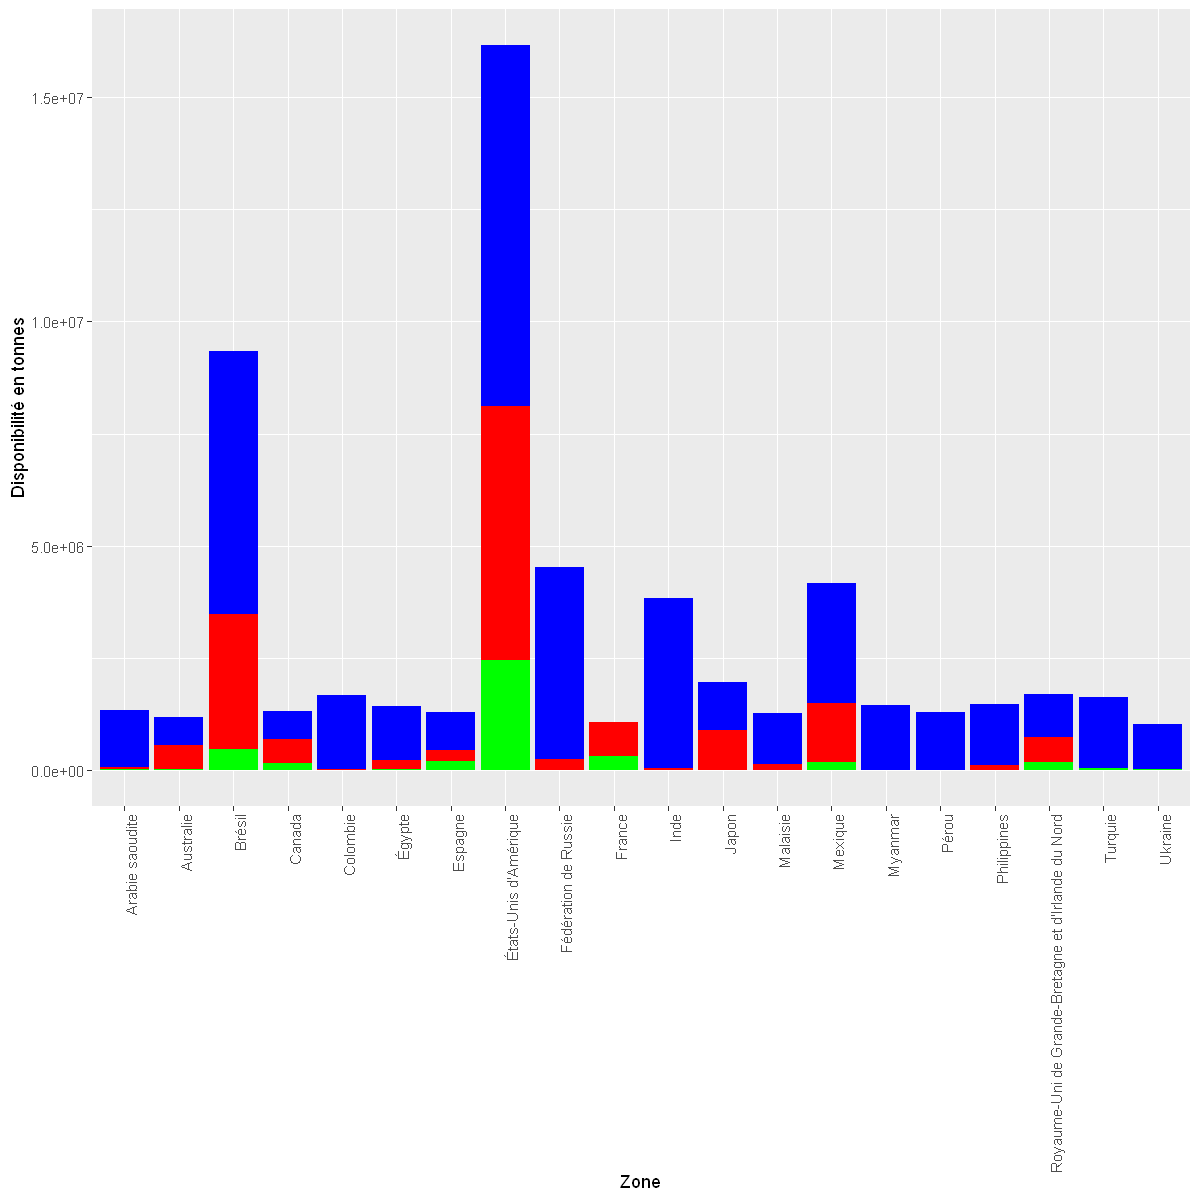

In [94]:
# Echantillon = TOP 20 Pays par ordre décroissant par rapport à la disponibilité en poulet
ggplot(data = Fichier_final[order(-Dispo_Poulet)][1:20], aes(x = Zone)) +
  geom_bar(aes(y = Dispo_Poulet), stat = "identity", position = "stack", fill = "blue") +
  geom_bar(aes(y = Dispo_Bovin), stat = "identity", position = "stack", fill = "red") +
  geom_bar(aes(y = Dispo_Dinde), stat = "identity", position = "stack", fill = "green") +
  labs(x = "Zone", y = "Disponibilité en tonnes") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) 
  #scale_fill_manual(name = "Type de viande",
                    #values = c("Dispo_Poulet" = "blue", "Dispo_Bovin" = "red", "Dispo_Dinde" = "green")) - légende mais ne fonctionne pas


- <span style="color:navy">Comparaison des valeurs de "Population"pour chaque zone</span>


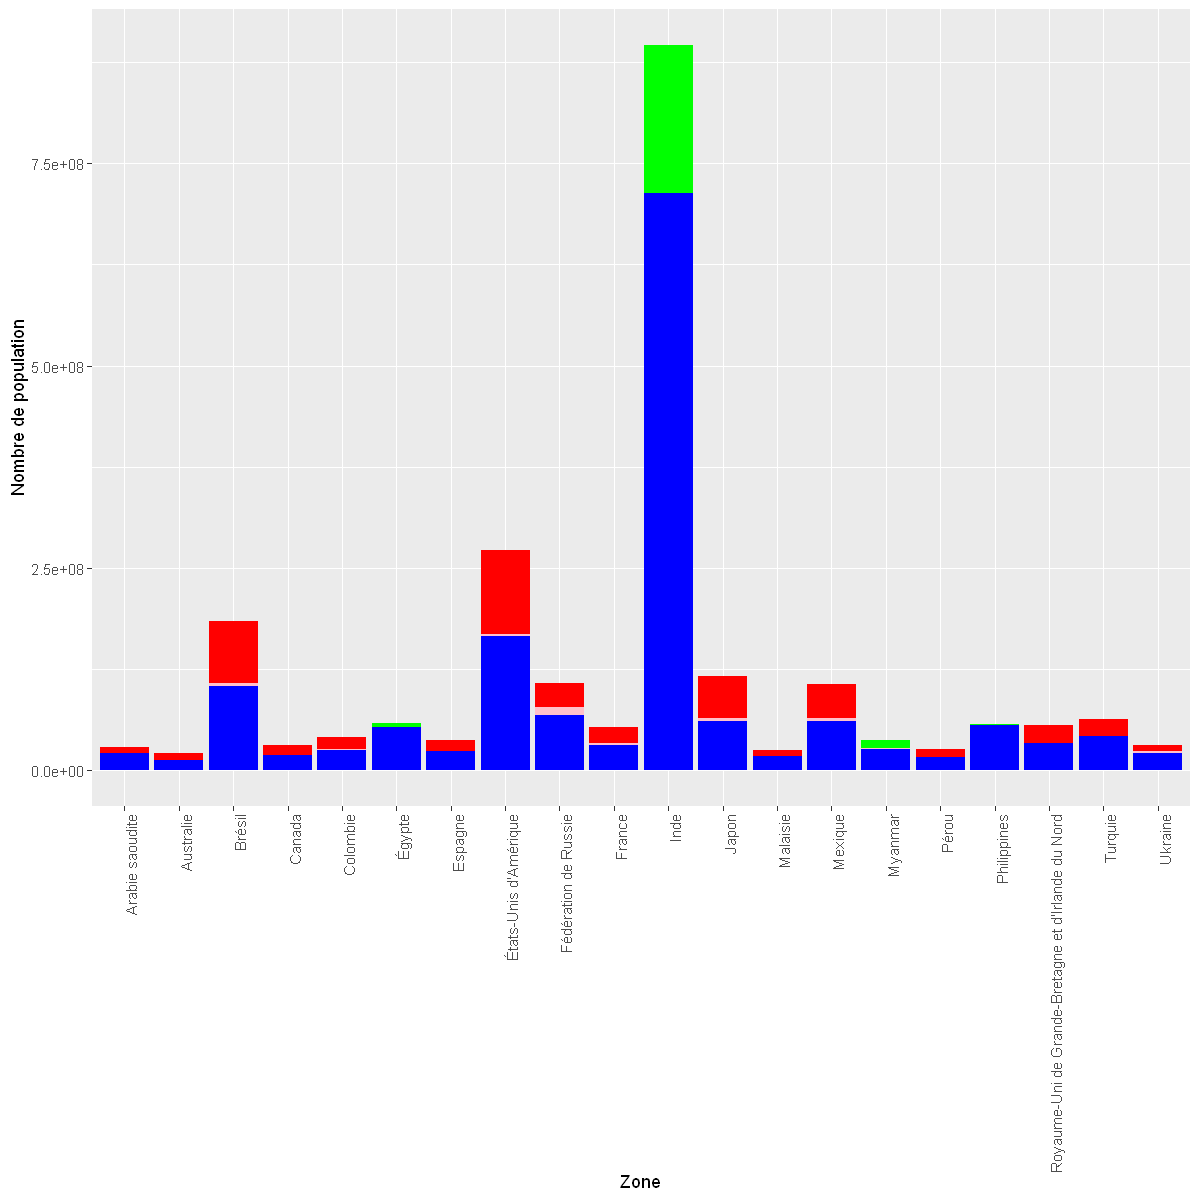

In [95]:
# Echantillon = TOP 20 Pays par ordre décroissant par rapport à la disponibilité en poulet
ggplot(data = Fichier_final[order(-Dispo_Poulet)][1:20], aes(x = Zone)) +
  geom_bar(aes(y = Pop_rural), stat = "identity", position = "stack", fill = "green") +
  geom_bar(aes(y = Pop_urbaine), stat = "identity", position = "stack", fill = "red") +
  geom_bar(aes(y = Femmes), stat = "identity", position = "stack", fill = "pink") +
  geom_bar(aes(y = Hommes), stat = "identity", position = "stack", fill = "blue") +
  labs(x = "Zone", y = "Nombre de population") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


- <span style="color:navy">Comparaison du nombre de population selon ces top 20 pays</span>


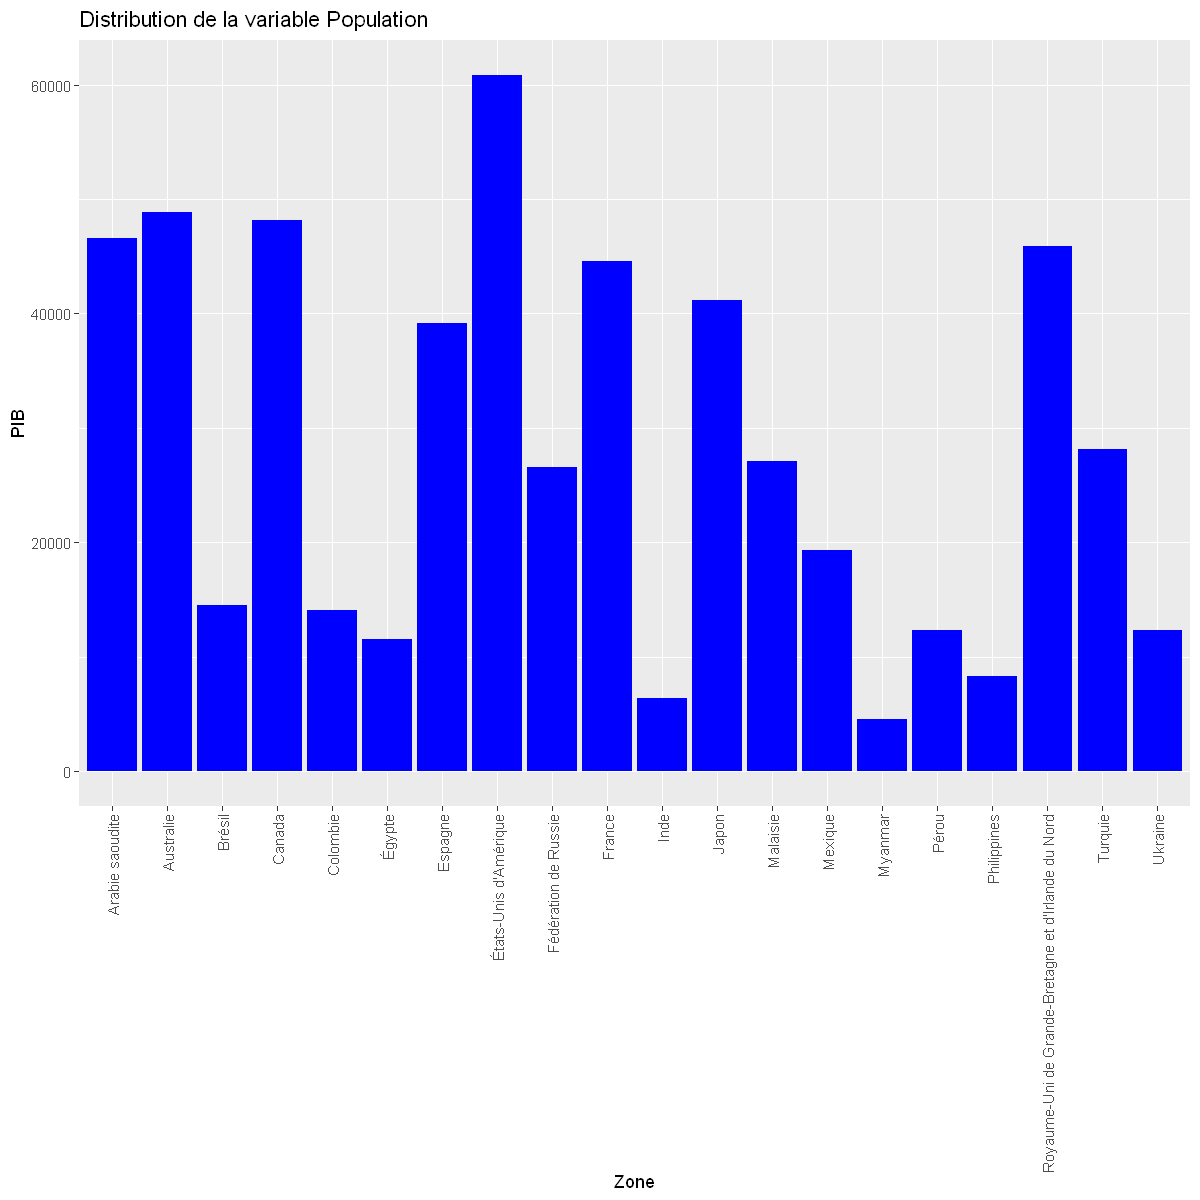

In [96]:
# Echantillon = TOP 20 Pays par ordre décroissant par rapport à la disponibilité en poulet

ggplot(Fichier_final[order(-Dispo_Poulet)][1:20], aes(y = PIB, x = Zone)) + 
  geom_col(fill = "blue") +
  labs(title = "Distribution de la variable Population") + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) 

 
- <span style="color:navy">Voir la répartition des valeurs avec un histogramme et boxplot</span>


In [97]:
#Calcul du nombre de bins idéales pour notre dataset selon la règle de Sturges
nbins <- 1 + log2(nrow(Fichier_final))
nbins

[1] 7.714246

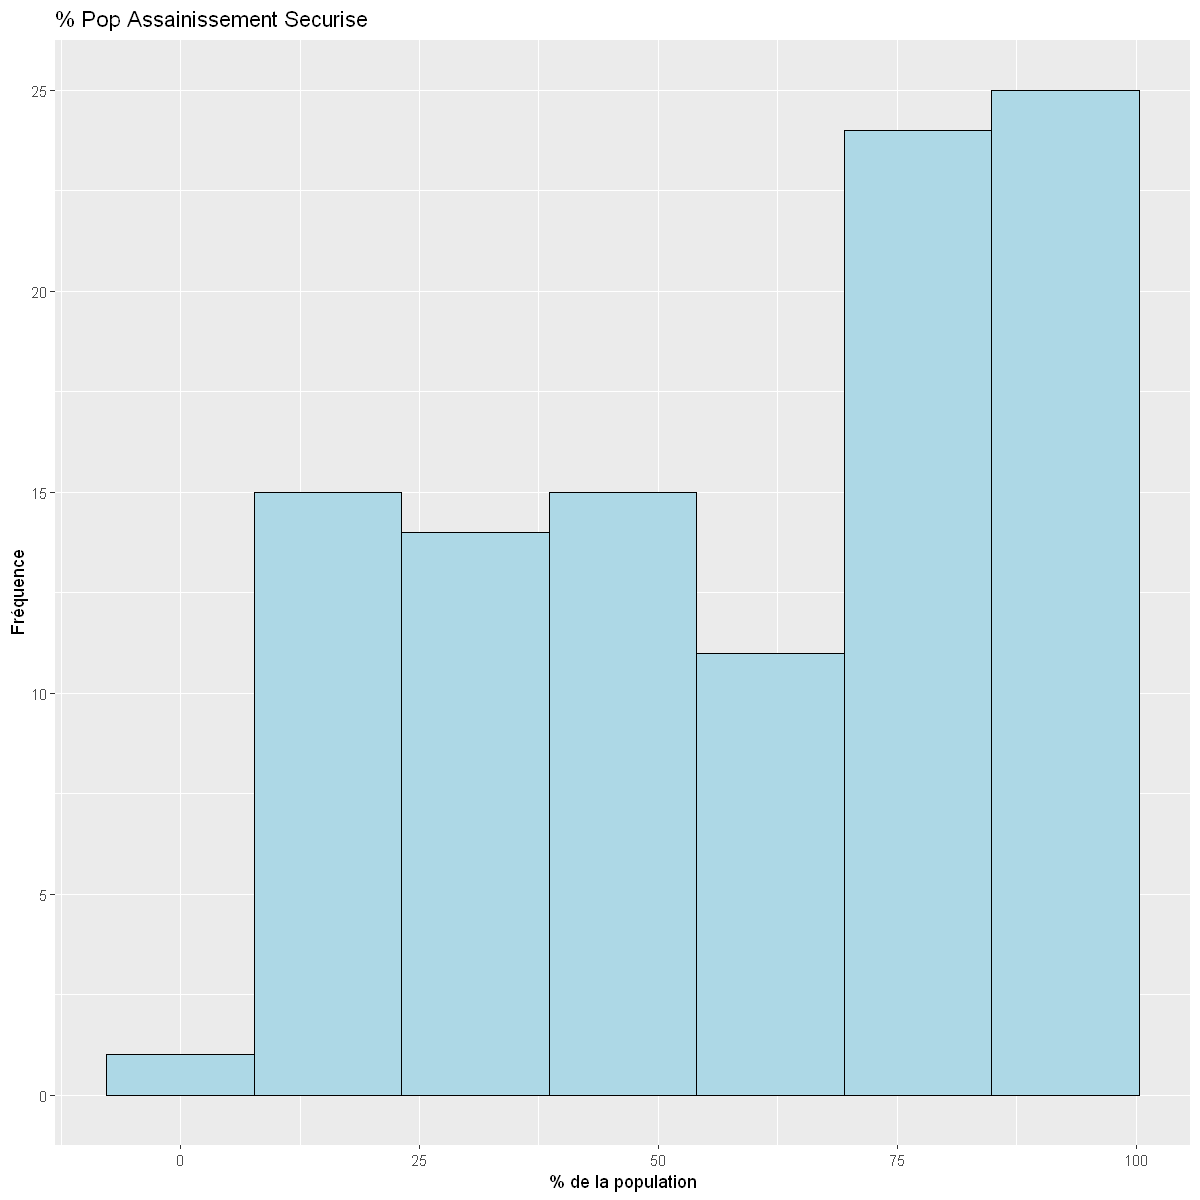

In [98]:

ggplot(Fichier_final, aes(x = Pop_Assainissement_sécu)) +
  geom_histogram(bins = 7, fill = "lightblue", color = "black") +
  ggtitle("% Pop Assainissement Securise") +
  xlab("% de la population") +
  ylab("Fréquence")

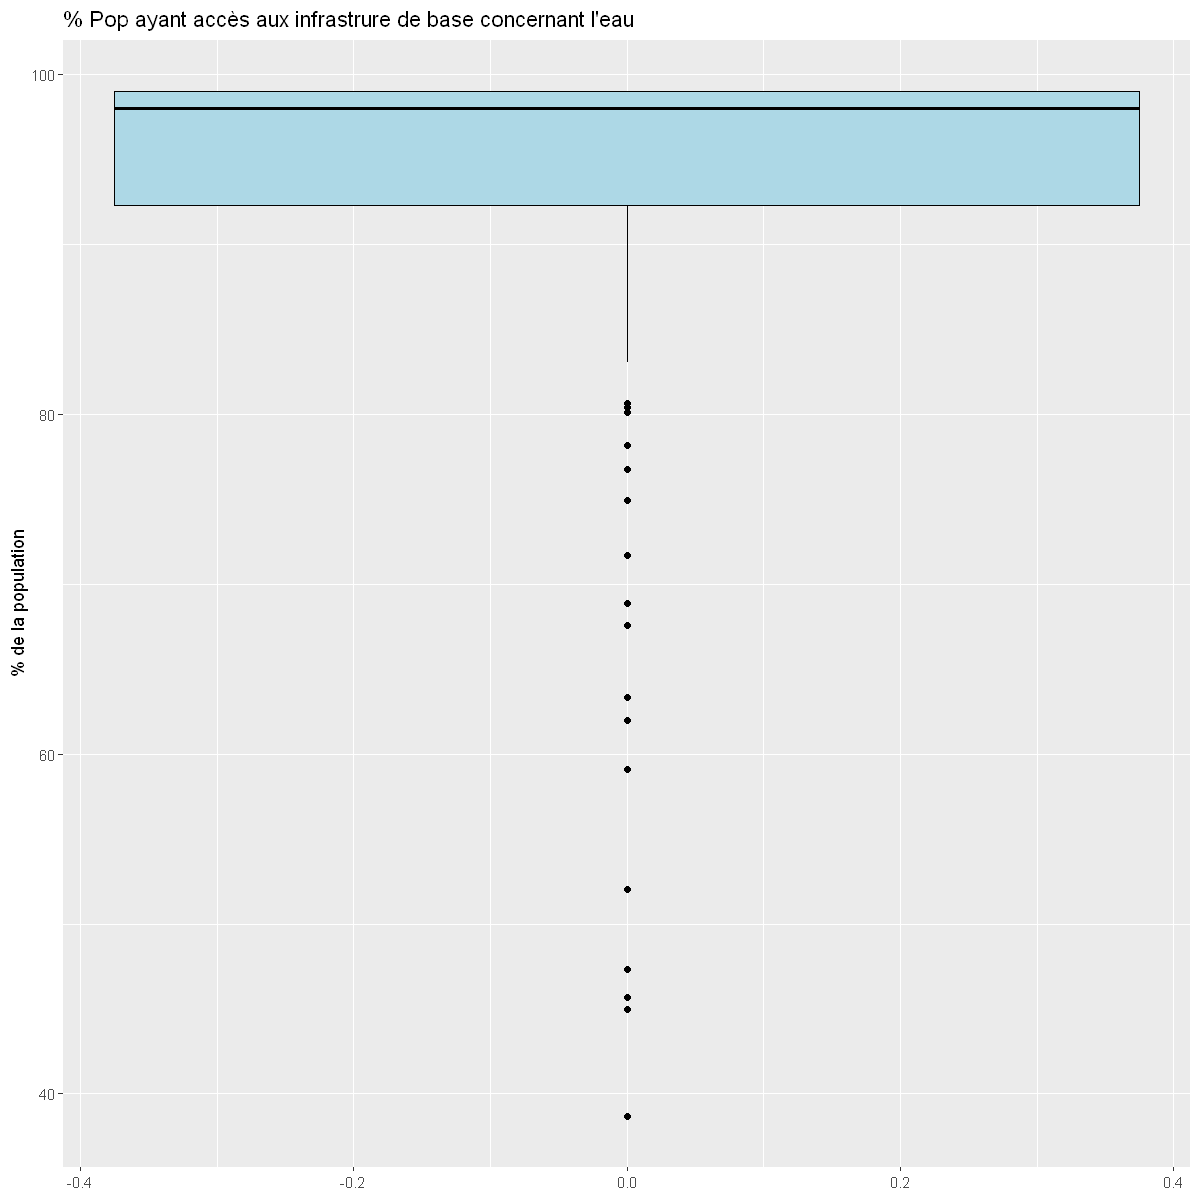

In [99]:
ggplot(Fichier_final, aes(y = Pop_eau_base)) +
  geom_boxplot(fill = "lightblue", color = "black") +
  ggtitle("% Pop ayant accès aux infrastrure de base concernant l'eau") +
  ylab("% de la population")


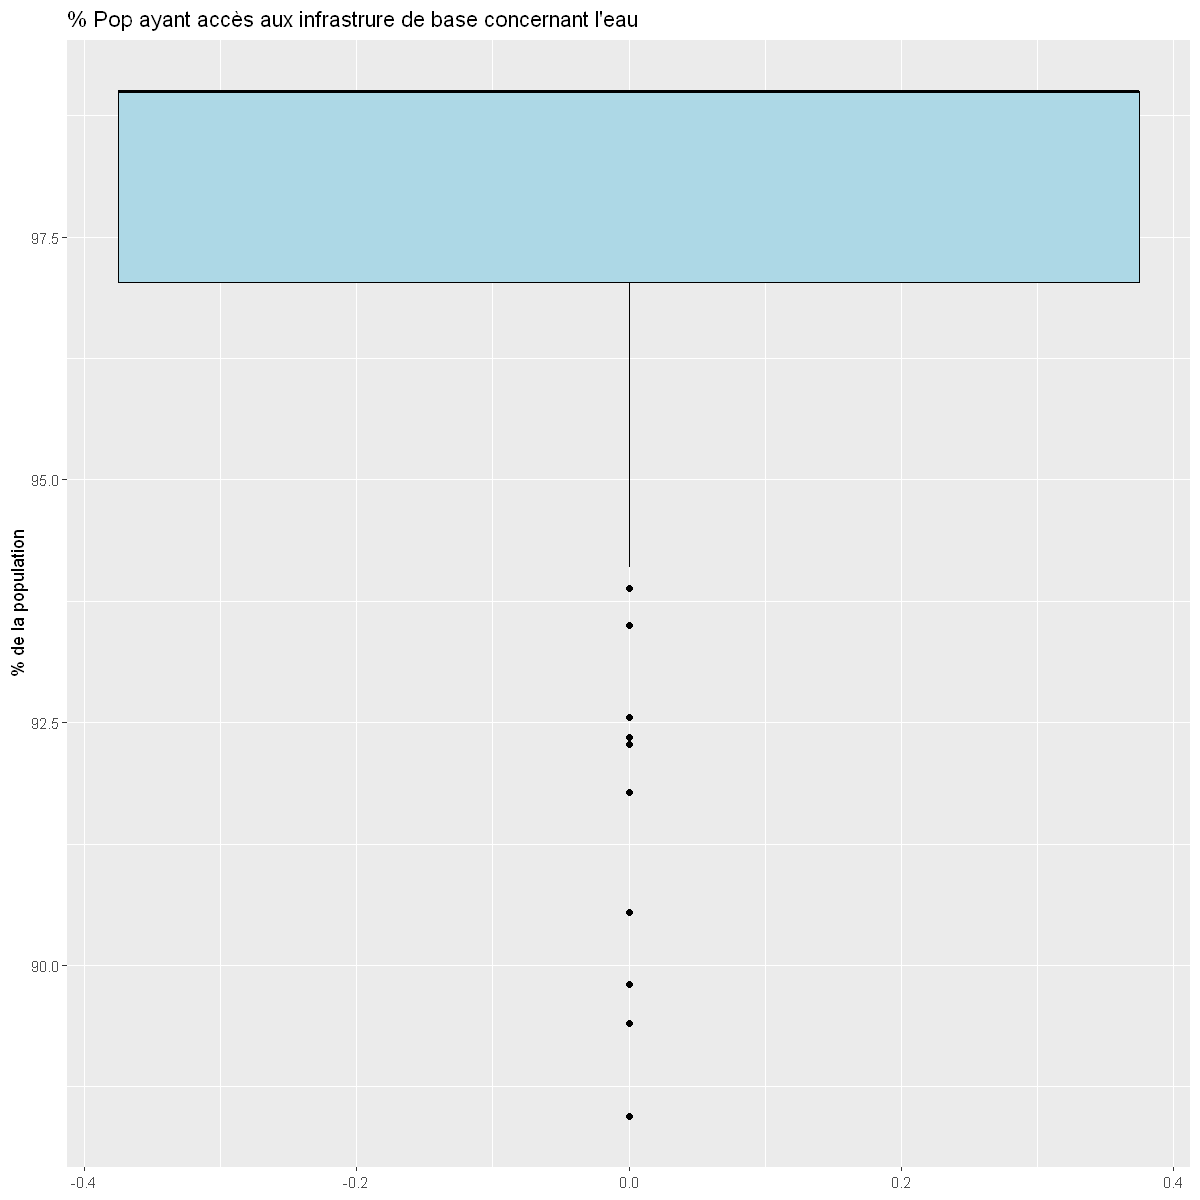

In [100]:
#pour une meilleur visibilité, je vais exclure les % de pop ayant accès aux infrastructures basiques infériéure à 85%
ggplot(subset(Fichier_final, Pop_eau_base > 85), aes(y = Pop_eau_base)) +
  geom_boxplot(fill = "lightblue", color = "black") +
  ggtitle("% Pop ayant accès aux infrastrure de base concernant l'eau") +
  ylab("% de la population")

 
- <span style="color:navy">Etudes de la corrélation entre les variables "PIB" et "EmissionsCO2" :</span>


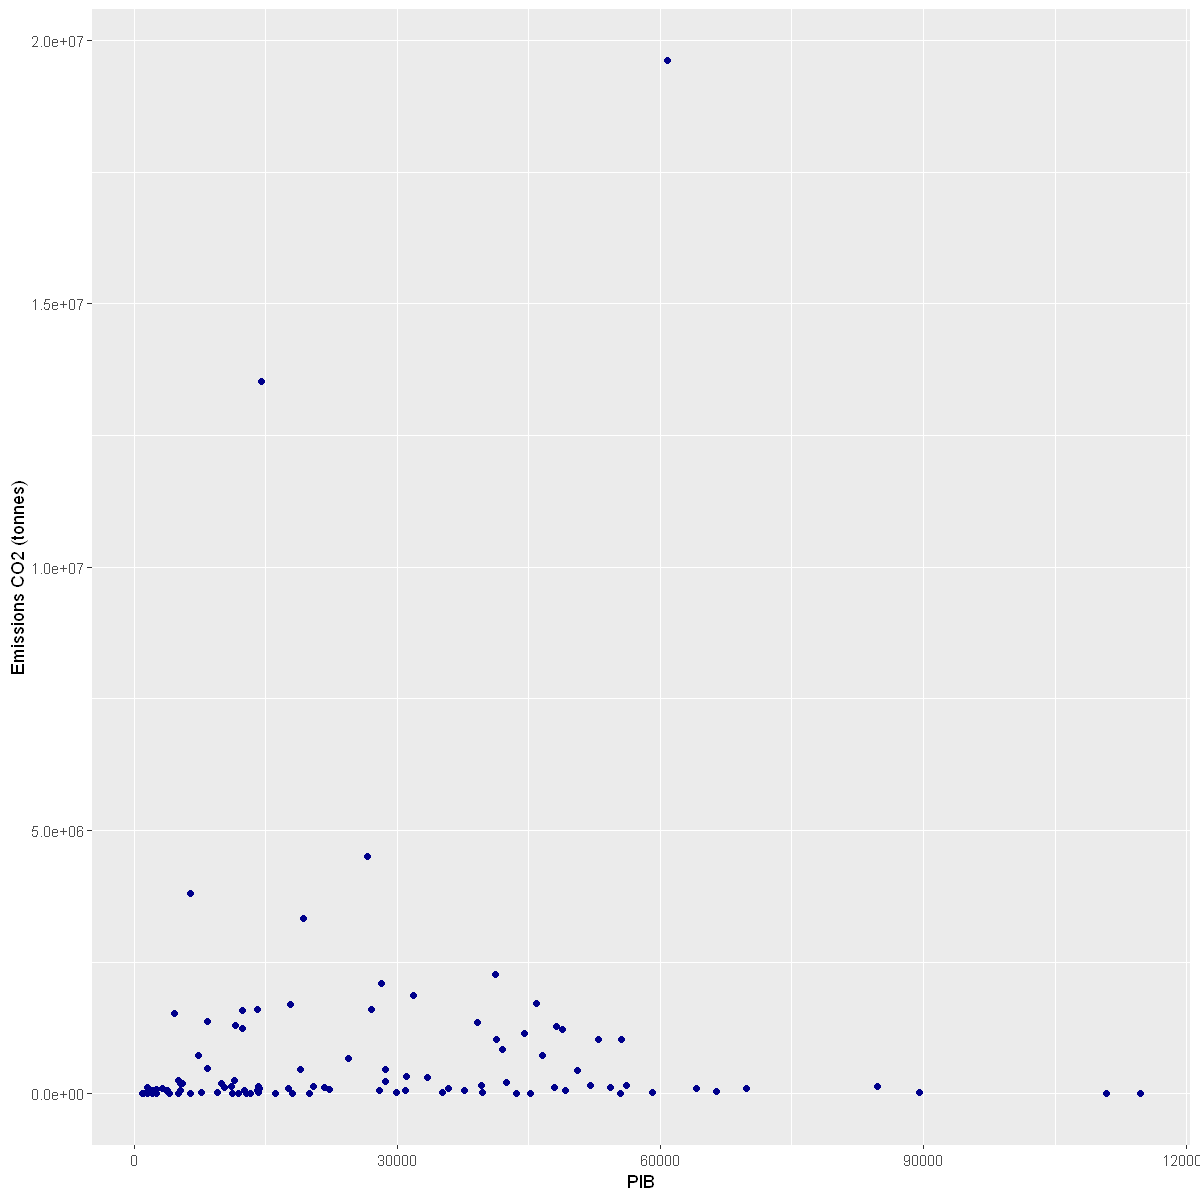

In [101]:
ggplot(data = Fichier_final, aes(x = PIB, y = EmissionsCO2)) +
  geom_point(color = "darkblue") +
  labs(x = "PIB", y = "Emissions CO2 (tonnes)")

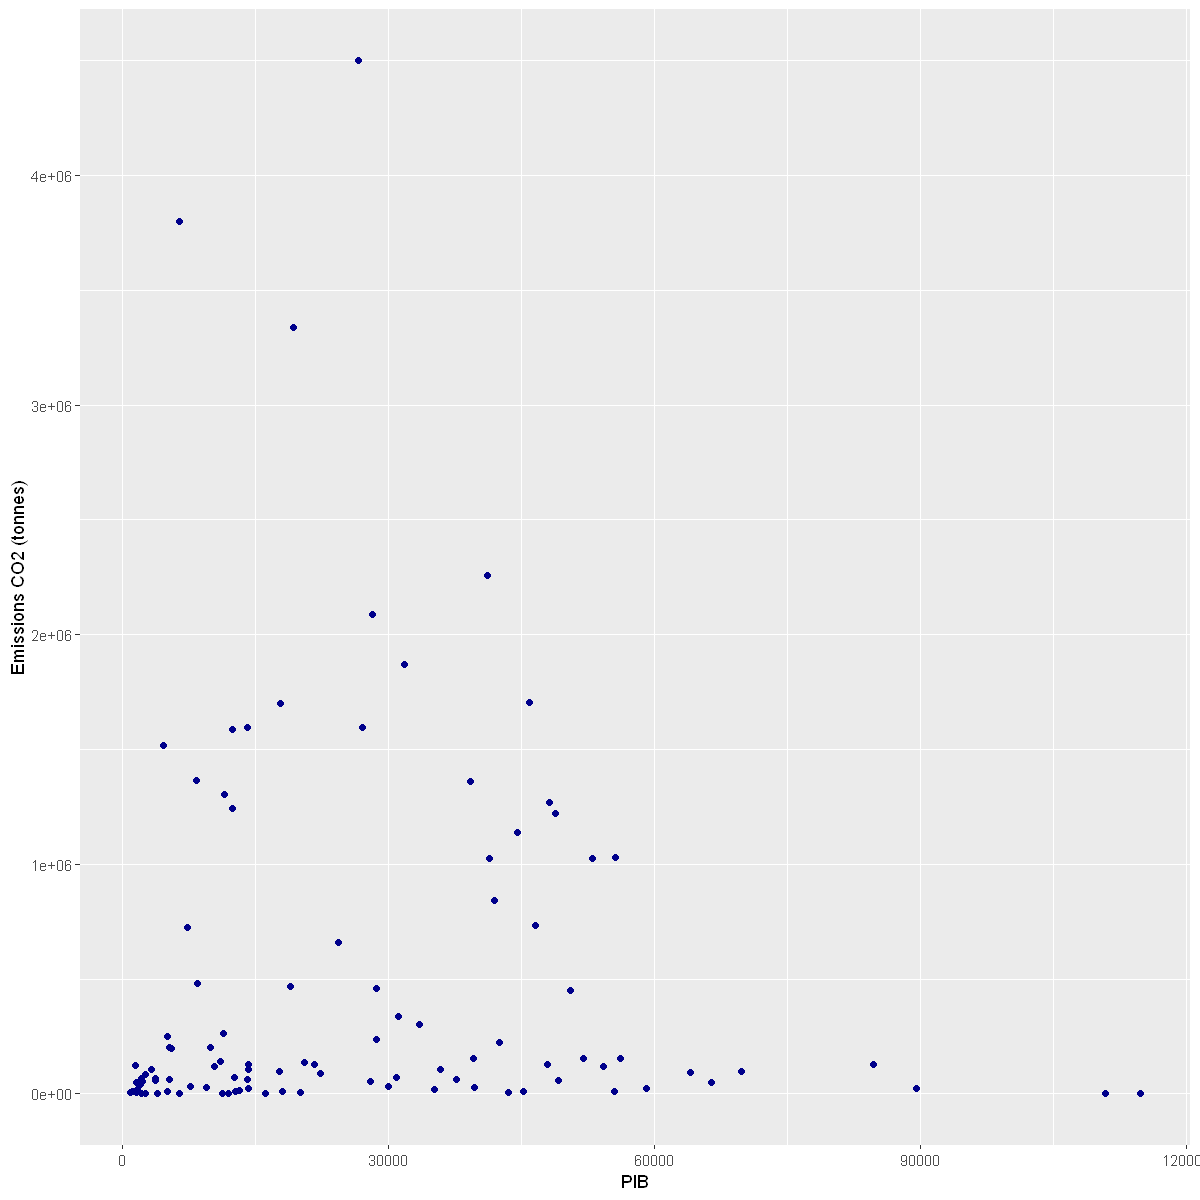

In [102]:
# Pour une meilleure visibilité, je vais exclure les valeurs aberrantes

# Calculer la moyenne et l'écart-type de la colonne EmissionsCO2
mean_EmissionsCO2 <- mean(Fichier_final$EmissionsCO2)
sd_EmissionsCO2 <- sd(Fichier_final$EmissionsCO2)

# Filtrer le dataset pour exclure les valeurs aberrantes. L'idée est que les valeurs qui se situent à plus de 3 écarts-types de la moyenne sont considérées comme des valeurs extrêmes
Fichier_final_filtre <- Fichier_final[Fichier_final$EmissionsCO2 > mean_EmissionsCO2 - 3*sd_EmissionsCO2 &
                                       Fichier_final$EmissionsCO2 < mean_EmissionsCO2 + 3*sd_EmissionsCO2,]

# Créer le graphique en utilisant le dataset filtré
ggplot(data = Fichier_final_filtre, aes(x = PIB, y = EmissionsCO2)) +
  geom_point(color = "darkblue") +
  labs(x = "PIB", y = "Emissions CO2 (tonnes)")

 
- <span style="color:navy">Etudes de la corrélation entre les variables "Importation" et "Dispo_Poulet" :</span>


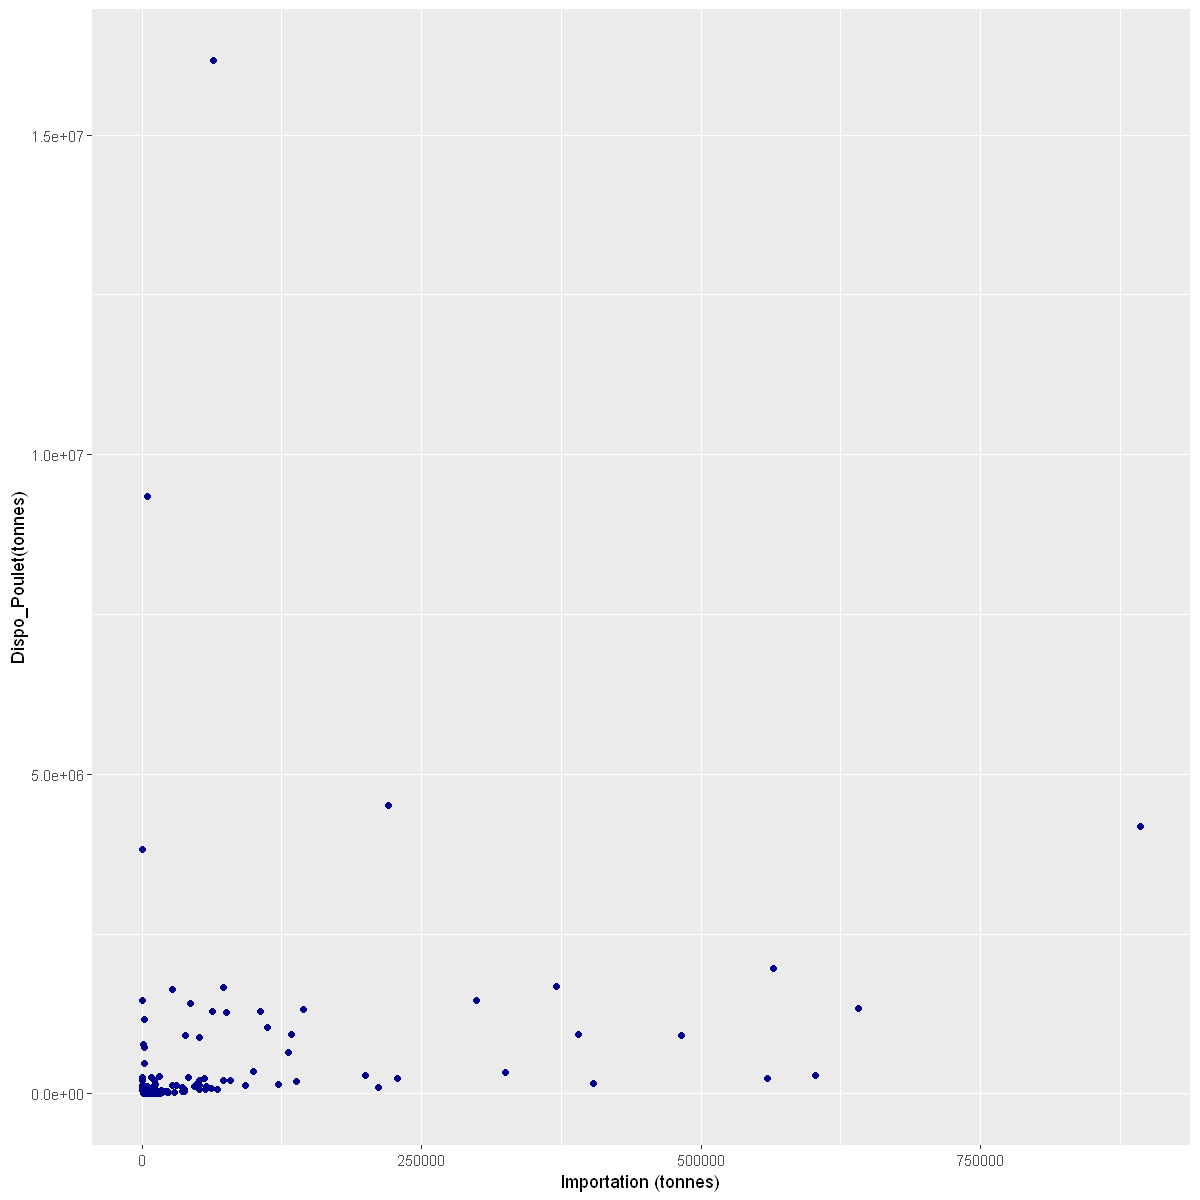

In [103]:
ggplot(data = Fichier_final, aes(x = Importation_Qté, y = Dispo_Poulet)) +
  geom_point(color = "darkblue") +
  labs(x = "Importation (tonnes)", y = "Dispo_Poulet(tonnes)")

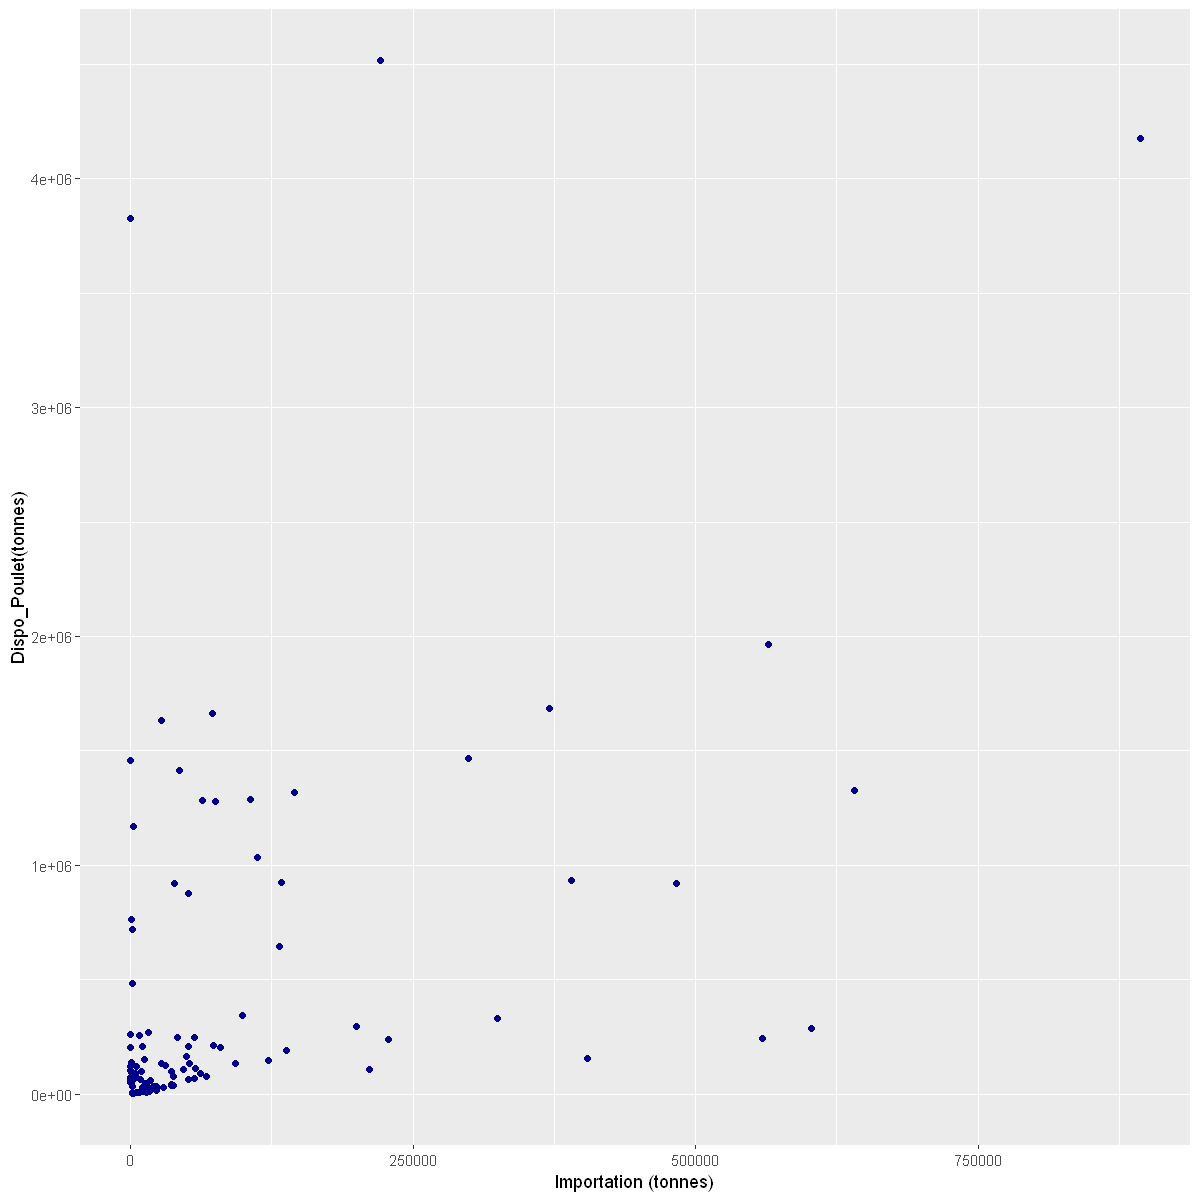

In [104]:
# Pour une meilleure visibilité, je vais exclure les valeurs aberrantes
# Calculer la moyenne et l'écart-type de la colonne Dispo_Poulet
mean_Dispo_Poulet <- mean(Fichier_final$Dispo_Poulet)
sd_Dispo_Poulet <- sd(Fichier_final$Dispo_Poulet)

# Filtrer le dataset pour exclure les valeurs aberrantes
Fichier_final_filtre2 <- Fichier_final[Fichier_final$Dispo_Poulet > mean_Dispo_Poulet - 3*sd_Dispo_Poulet &
                                       Fichier_final$Dispo_Poulet < mean_Dispo_Poulet + 3*sd_Dispo_Poulet,]

# Créer le graphique en utilisant le dataset filtré
ggplot(data = Fichier_final_filtre2, aes(x = Importation_Qté, y = Dispo_Poulet)) +
  geom_point(color = "darkblue") +
  labs(x = "Importation (tonnes)", y = "Dispo_Poulet(tonnes)")

##### Etudes de la corrélation entre les variables "Stabilité politique" et "Besoin energetique minimum" :

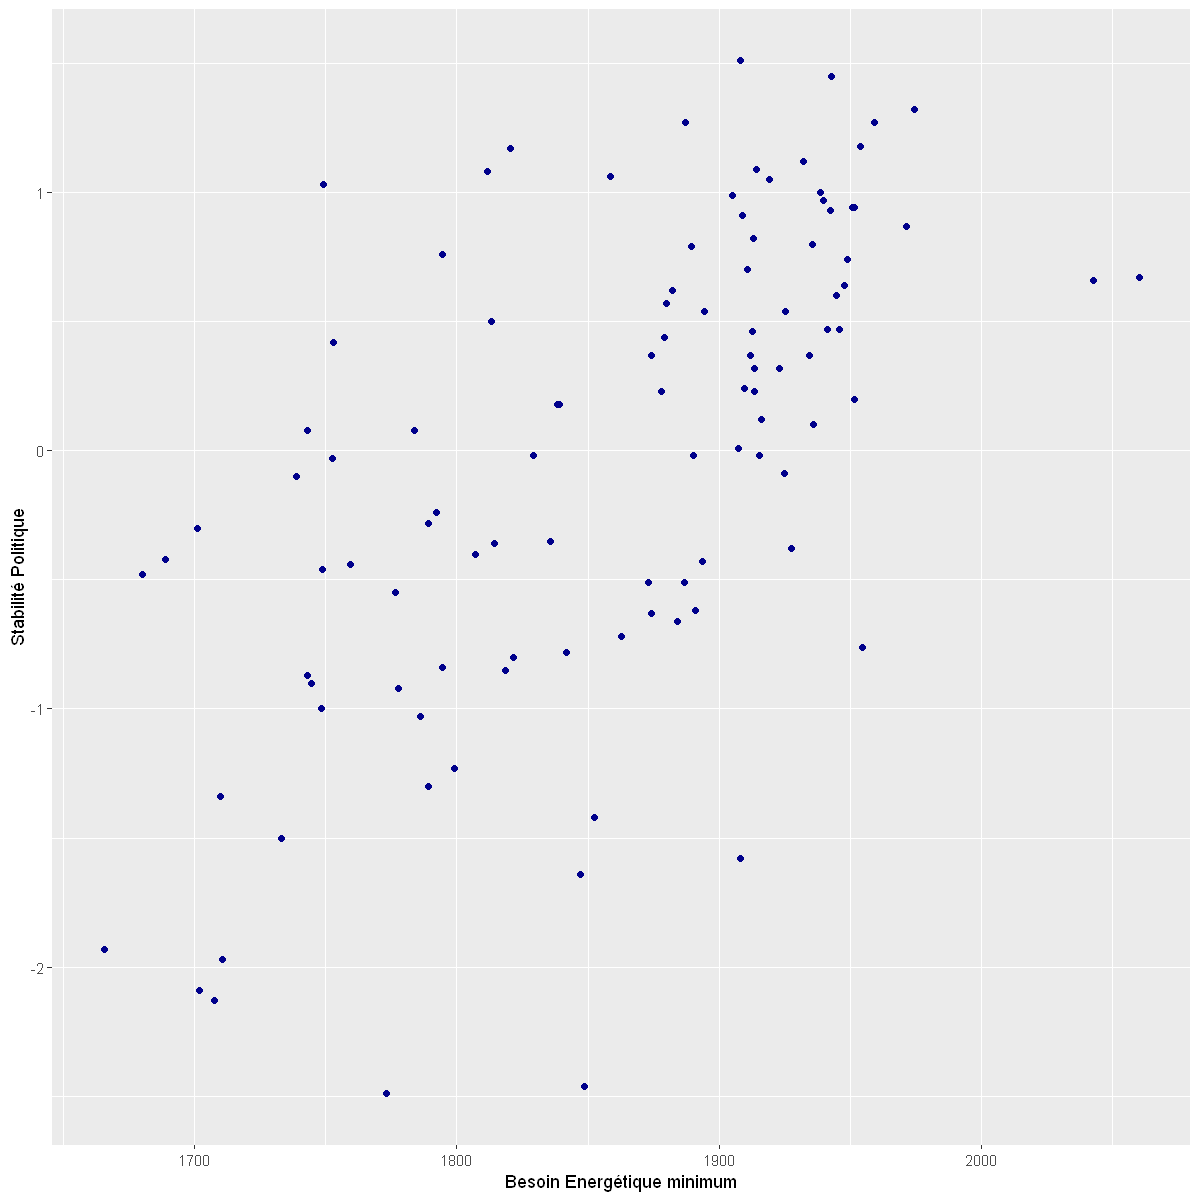

In [105]:
ggplot(data = Fichier_final, aes(x = Besoin_Eie_Min, y = Stabilité_Pol)) +
  geom_point(color = "darkblue") +
  labs(x = "Besoin Energétique minimum", y = "Stabilité Politique")

##### Etudes de la corrélation entre les variables "_Pop_Assainissement_sécu" et " Pop_eau_base " :

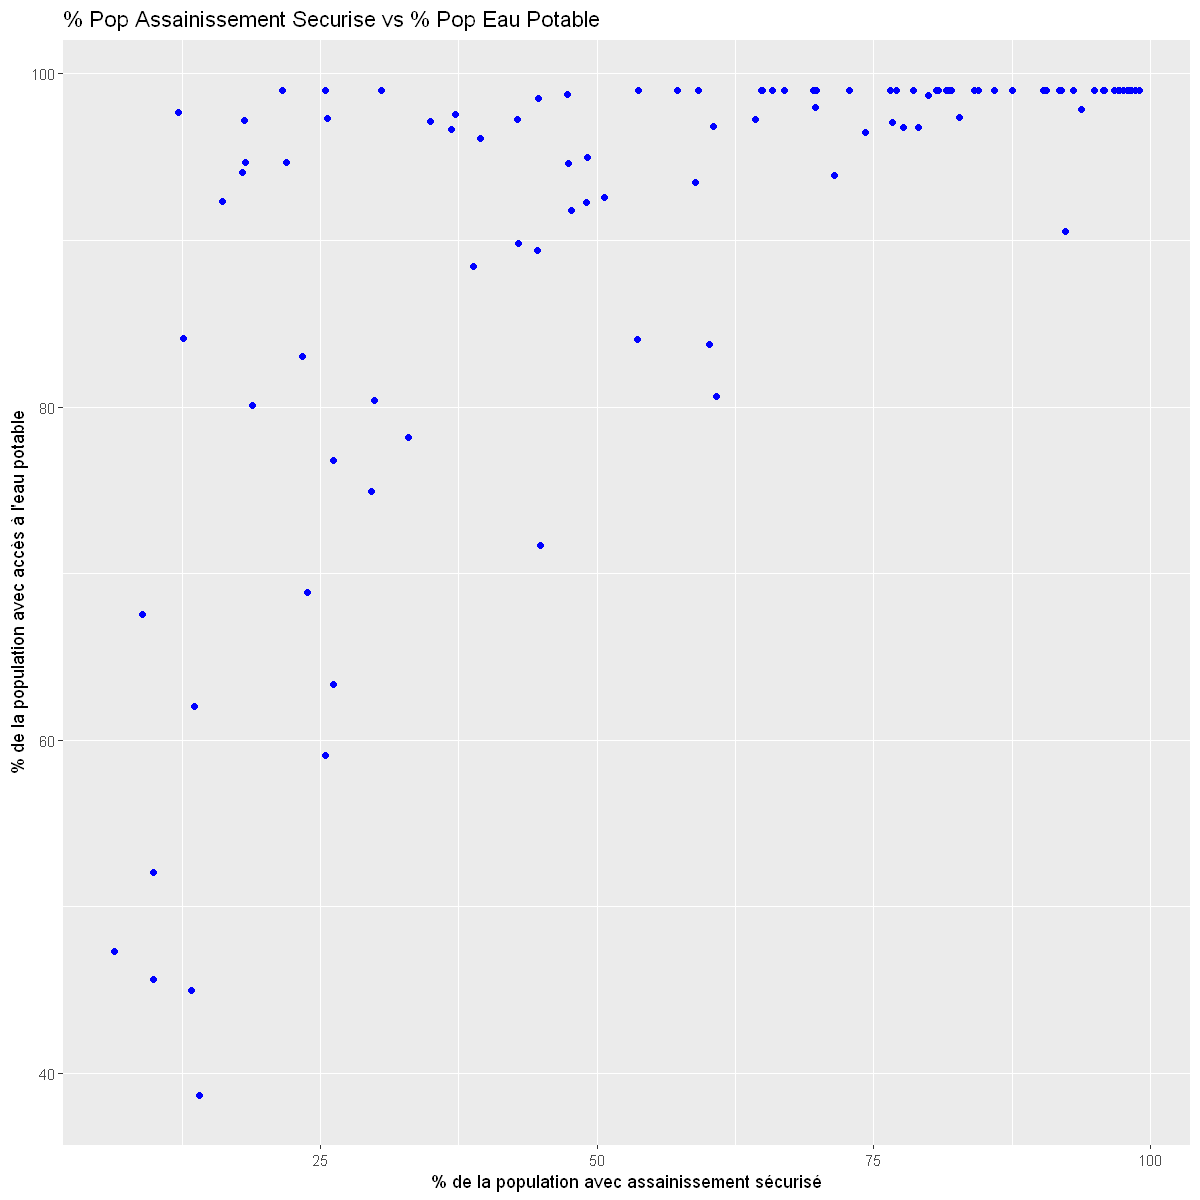

In [106]:
ggplot(Fichier_final, aes(x = Pop_Assainissement_sécu, y = Pop_eau_base)) +
  geom_point(color = "blue") +
  ggtitle("% Pop Assainissement Securise vs % Pop Eau Potable") +
  xlab("% de la population avec assainissement sécurisé") +
  ylab("% de la population avec accès à l'eau potable")

##### Etudes de la corrélation entre les variables "Besoin_Eie_Min" et " Besoin_Eie_Moy "

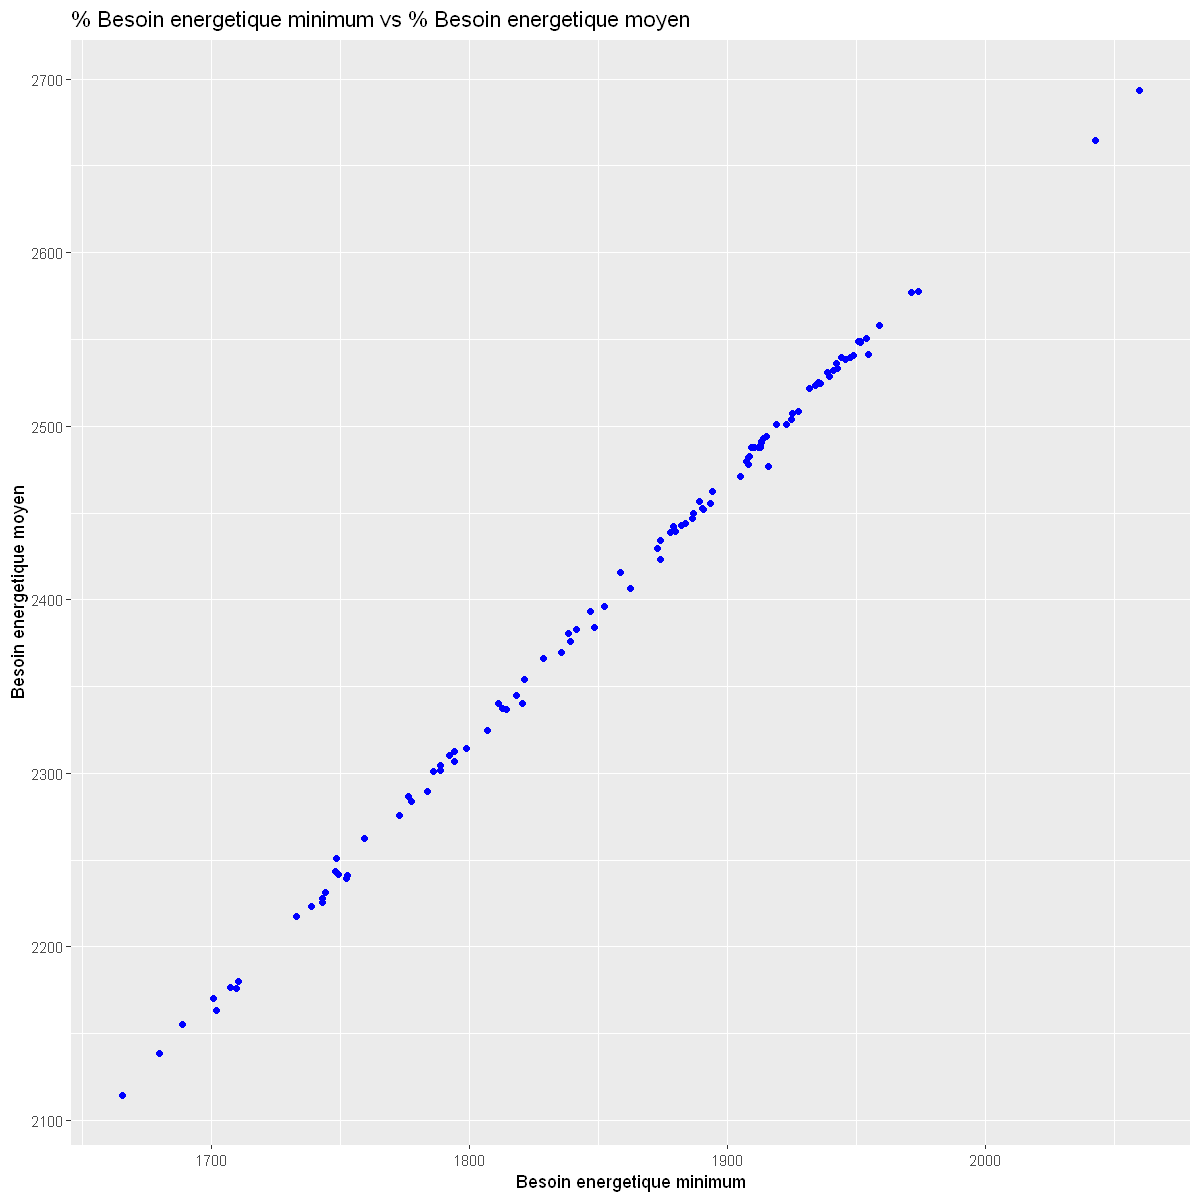

In [107]:
ggplot(Fichier_final, aes(x = `Besoin_Eie_Min`, y = `Besoin_Eie_Moy`)) +
  geom_point(color = "blue") +
  ggtitle("% Besoin energetique minimum vs % Besoin energetique moyen") +
  xlab("Besoin energetique minimum") +
  ylab("Besoin energetique moyen")


- <span style="color:navy">Etudes de corrélation générale entre les différentes variables</span>



<span style="color:rebeccapurple">Matrice de correlation</span>


In [108]:
# ne prendre en compte que les valeurs numériques
Fichier_numérique <- select_if(Fichier_final, is.numeric)
head(Fichier_numérique)

Femmes,Hommes,Pop_rural,Pop_total,Pop_urbaine,EmissionsCO2,Importation_Qté,Importation_Valeur,Dispo_Bovin,Dispo_Dinde,Dispo_Poulet,Besoin_Eie_Min,Besoin_Eie_Moy,PIB,Pop_Assainissement_sécu,Pop_Assainissement_base,Pop_eau_base,Stabilité_Pol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1433803,1436558,1139793,2870362,1798169,13013.6,23050.38,25427200,513.53,731.41,32180.28,1909.50,2487.50,13248.75,47.45,98.88,94.6,0.24
20937518,21742192,11437591,42679711,31223963,261207.2,5.62,6600,36693.78,21313.79,263055.24,1777.75,2283.50,11406.38,17.95,86.22,94.1,-0.92
42093613,40987737,18630197,83081350,63765330,1026327.0,482983.66,1192031400,827956.00,485397.02,919105.15,1944.50,2539.75,52977.78,97.07,99.00,99.0,0.60
14866563,20530660,5434605,35397224,28686504,732000.0,640715.39,1204756600,73371.44,21313.41,1329242.95,1874.00,2423.50,46571.40,57.25,99.00,99.0,-0.63
1545773,1275359,1079185,2821132,1856801,11460.0,35786.65,37624400,3330.45,180.25,44138.53,1873.00,2429.75,12775.98,66.95,93.75,99.0,-0.51
12748818,12554755,3478491,25303574,21603524,1220210.4,2151.42,8058600,566012.06,19256.16,1171442.17,1908.75,2482.50,48853.85,72.83,99.00,99.0,0.91


In [109]:
#calcul des coeff de corrélation entre les différentes paires possibles de variables.

matrice.correlation <- cor(Fichier_numérique)
matrice.correlation

,Femmes,Hommes,Pop_rural,Pop_total,Pop_urbaine,EmissionsCO2,Importation_Qté,Importation_Valeur,Dispo_Bovin,Dispo_Dinde,Dispo_Poulet,Besoin_Eie_Min,Besoin_Eie_Moy,PIB,Pop_Assainissement_sécu,Pop_Assainissement_base,Pop_eau_base,Stabilité_Pol
Femmes,1.00000000,0.99933293,0.96760333,0.99982384,0.935781710,0.41024658,0.03092712,0.03449324,0.25900034,0.23125988,0.44840522,-0.11716658,-0.11335452,-0.10201843,-0.06017779,-0.084076171,-0.02638844,-0.19672102
Hommes,0.99933293,1.00000000,0.97445743,0.99984234,0.925223047,0.38686694,0.02543382,0.02845911,0.23723119,0.21220862,0.42513081,-0.11636169,-0.11282464,-0.10056392,-0.06107782,-0.084151694,-0.02706549,-0.19121515
Pop_rural,0.96760333,0.97445743,1.00000000,0.97128723,0.816796383,0.18910683,-0.05095489,-0.05542324,0.03983676,0.03547298,0.22737823,-0.15556148,-0.15278114,-0.13907292,-0.10717690,-0.133610677,-0.07581909,-0.18726814
Pop_total,0.99982384,0.99984234,0.97128723,1.00000000,0.930511140,0.39829916,0.02810903,0.03139779,0.24785542,0.22150717,0.43651825,-0.11677244,-0.11310109,-0.10128790,-0.06065038,-0.084129000,-0.02674080,-0.19392411
Pop_urbaine,0.93578171,0.92522305,0.81679638,0.93051114,1.000000000,0.67294659,0.15269339,0.16469298,0.53792917,0.47838863,0.70727400,-0.04361436,-0.03889231,-0.03277539,0.01716085,0.002213072,0.05381810,-0.18102090
EmissionsCO2,0.41024658,0.38686694,0.18910683,0.39829916,0.672946592,1.00000000,0.09307044,0.11674736,0.93552602,0.85170814,0.98859293,0.11774916,0.12109106,0.08364319,0.12555464,0.124702443,0.13565771,-0.05760779
Importation_Qté,0.03092712,0.02543382,-0.05095489,0.02810903,0.152693388,0.09307044,1.00000000,0.91006814,0.14432092,0.08936618,0.16038026,0.22253585,0.22154029,0.25645139,0.25157700,0.221479505,0.23293350,0.05402080
Importation_Valeur,0.03449324,0.02845911,-0.05542324,0.03139779,0.164692981,0.11674736,0.91006814,1.00000000,0.18973022,0.16499395,0.16236217,0.28283896,0.28464881,0.36097829,0.35359313,0.267836322,0.25842350,0.14701916
Dispo_Bovin,0.25900034,0.23723119,0.03983676,0.24785542,0.537929168,0.93552602,0.14432092,0.18973022,1.00000000,0.95230136,0.93431006,0.15169563,0.15517912,0.15893343,0.16812665,0.122925042,0.12316797,0.03372757
Dispo_Dinde,0.23125988,0.21220862,0.03547298,0.22150717,0.478388625,0.85170814,0.08936618,0.16499395,0.95230136,1.00000000,0.85712240,0.16693353,0.17015429,0.17841618,0.19663574,0.116253814,0.10575853,0.04335109


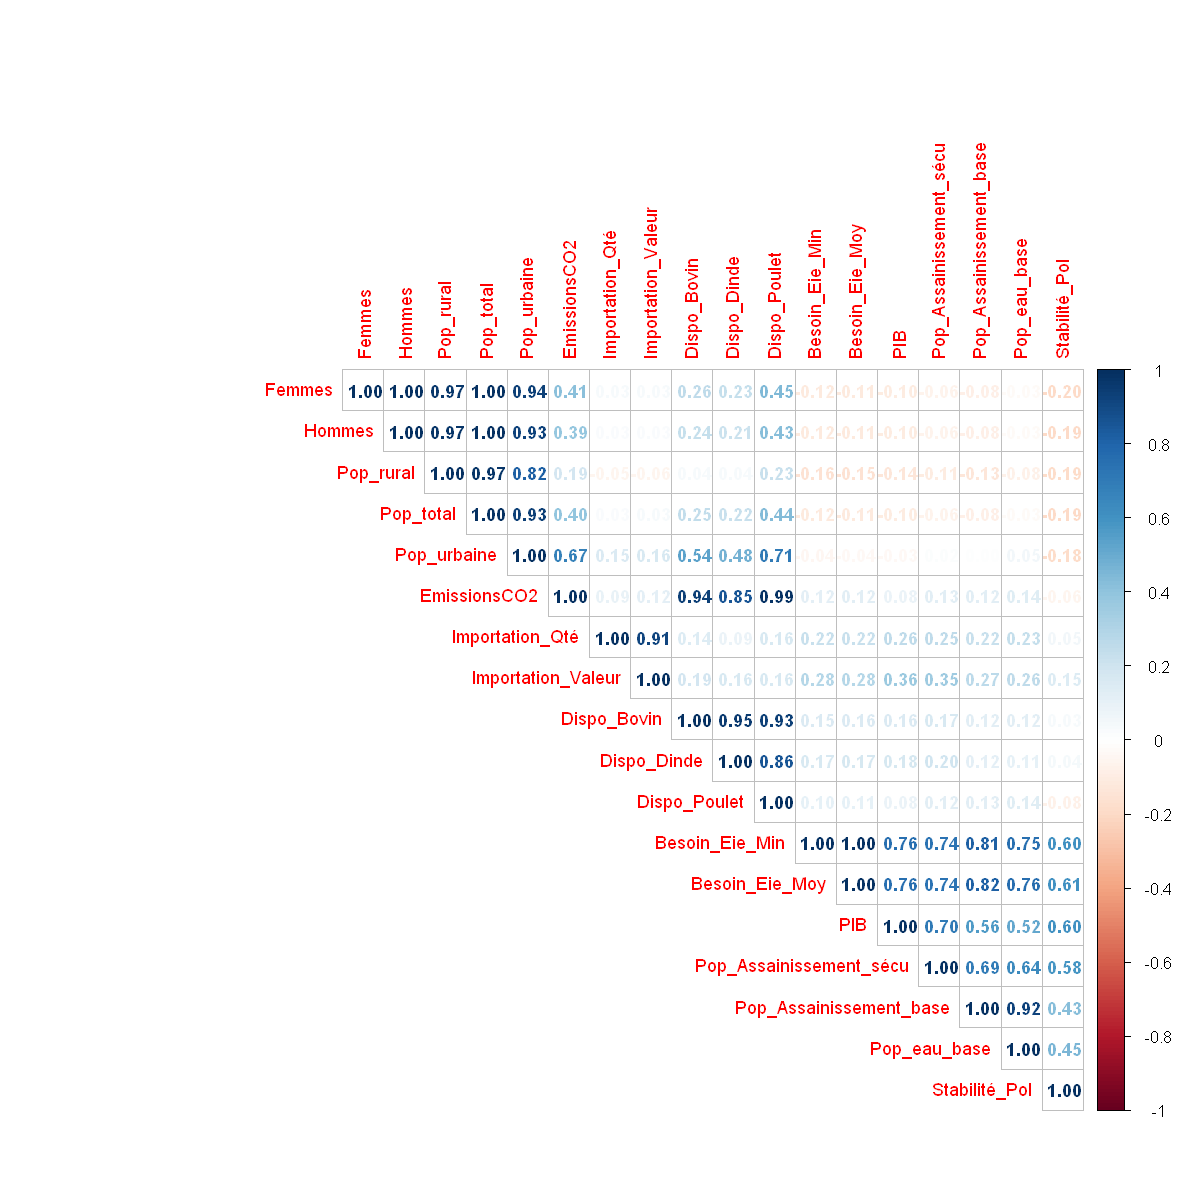

In [110]:
#visualisation de la corrélation
corrplot(matrice.correlation, method = "number", tl.cex=0.9,number.cex=0.9, type="upper")

Les corrélations positives sont affichées en bleu et les corrélations négatives en rouge. L’intensité de la couleur et la taille des cercles sont proportionnelles aux coefficients de corrélation. Plus c'est fin, plus c'est correlé. A droite du corrélogramme, la légende de couleurs montre les coefficients de corrélation et les couleurs correspondantes.


<span style="color:rebeccapurple">Suppréssion des colonnes correlées</span>


In [111]:
# Supprimer colonnes corrélées
Fichier_final[ ,c("Femmes", "Hommes", "Pop_rural", "Pop_urbaine", "EmissionsCO2","Importation_Valeur","Dispo_Bovin","Dispo_Dinde",
                 "Besoin_Eie_Min","Pop_eau_base") := NULL]
head(Fichier_final)

Zone,Pop_total,Importation_Qté,Dispo_Poulet,Besoin_Eie_Moy,PIB,Pop_Assainissement_sécu,Pop_Assainissement_base,Stabilité_Pol
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Albanie,2870362,23050.38,32180.28,2487.50,13248.75,47.45,98.88,0.24
Algérie,42679711,5.62,263055.24,2283.50,11406.38,17.95,86.22,-0.92
Allemagne,83081350,482983.66,919105.15,2539.75,52977.78,97.07,99.00,0.60
Arabie saoudite,35397224,640715.39,1329242.95,2423.50,46571.40,57.25,99.00,-0.63
Arménie,2821132,35786.65,44138.53,2429.75,12775.98,66.95,93.75,-0.51
Australie,25303574,2151.42,1171442.17,2482.50,48853.85,72.83,99.00,0.91


Pop_total,Importation_Qté,Dispo_Poulet,Besoin_Eie_Moy,PIB,Pop_Assainissement_sécu,Pop_Assainissement_base,Stabilité_Pol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2870362,23050.38,32180.28,2487.50,13248.75,47.45,98.88,0.24
42679711,5.62,263055.24,2283.50,11406.38,17.95,86.22,-0.92
83081350,482983.66,919105.15,2539.75,52977.78,97.07,99.00,0.60
35397224,640715.39,1329242.95,2423.50,46571.40,57.25,99.00,-0.63
2821132,35786.65,44138.53,2429.75,12775.98,66.95,93.75,-0.51
25303574,2151.42,1171442.17,2482.50,48853.85,72.83,99.00,0.91


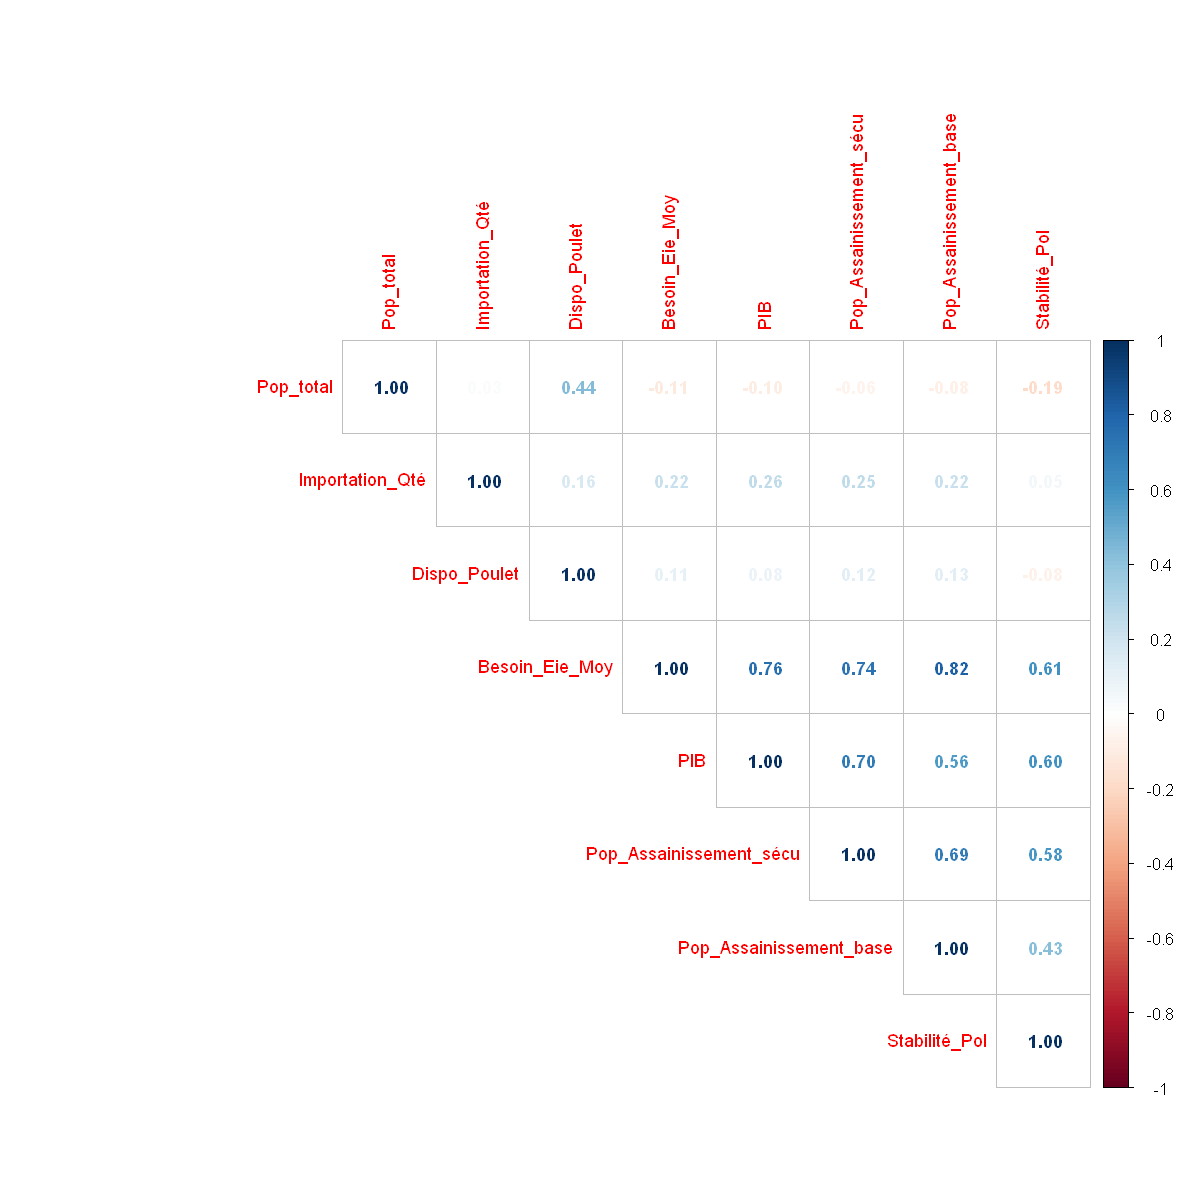

In [112]:
#visualisation de la corrélation après suppréssion colonnes
# ne prendre en compte que les valeurs numériques
Fichier_numérique2 <- select_if(Fichier_final, is.numeric)
head(Fichier_numérique2)

matrice.correlation2 <- cor(Fichier_numérique2)

#visualisation de la corrélation
corrplot(matrice.correlation2, method = "number", tl.cex=0.9,number.cex=0.9, type="upper")

- Nous avons encore une assez forte correlation entre le besoin energétique moyen et les différents infrastuctures (supérieur à 70%). Je vais supprimer les besoins énergétiques moyens.

In [113]:
# Supprimer colonnes corrélées
Fichier_final[ , Besoin_Eie_Moy := NULL]
head(Fichier_final)

Zone,Pop_total,Importation_Qté,Dispo_Poulet,PIB,Pop_Assainissement_sécu,Pop_Assainissement_base,Stabilité_Pol
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Albanie,2870362,23050.38,32180.28,13248.75,47.45,98.88,0.24
Algérie,42679711,5.62,263055.24,11406.38,17.95,86.22,-0.92
Allemagne,83081350,482983.66,919105.15,52977.78,97.07,99.00,0.60
Arabie saoudite,35397224,640715.39,1329242.95,46571.40,57.25,99.00,-0.63
Arménie,2821132,35786.65,44138.53,12775.98,66.95,93.75,-0.51
Australie,25303574,2151.42,1171442.17,48853.85,72.83,99.00,0.91


Pop_total,Importation_Qté,Dispo_Poulet,PIB,Pop_Assainissement_sécu,Pop_Assainissement_base,Stabilité_Pol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2870362,23050.38,32180.28,13248.75,47.45,98.88,0.24
42679711,5.62,263055.24,11406.38,17.95,86.22,-0.92
83081350,482983.66,919105.15,52977.78,97.07,99.00,0.60
35397224,640715.39,1329242.95,46571.40,57.25,99.00,-0.63
2821132,35786.65,44138.53,12775.98,66.95,93.75,-0.51
25303574,2151.42,1171442.17,48853.85,72.83,99.00,0.91


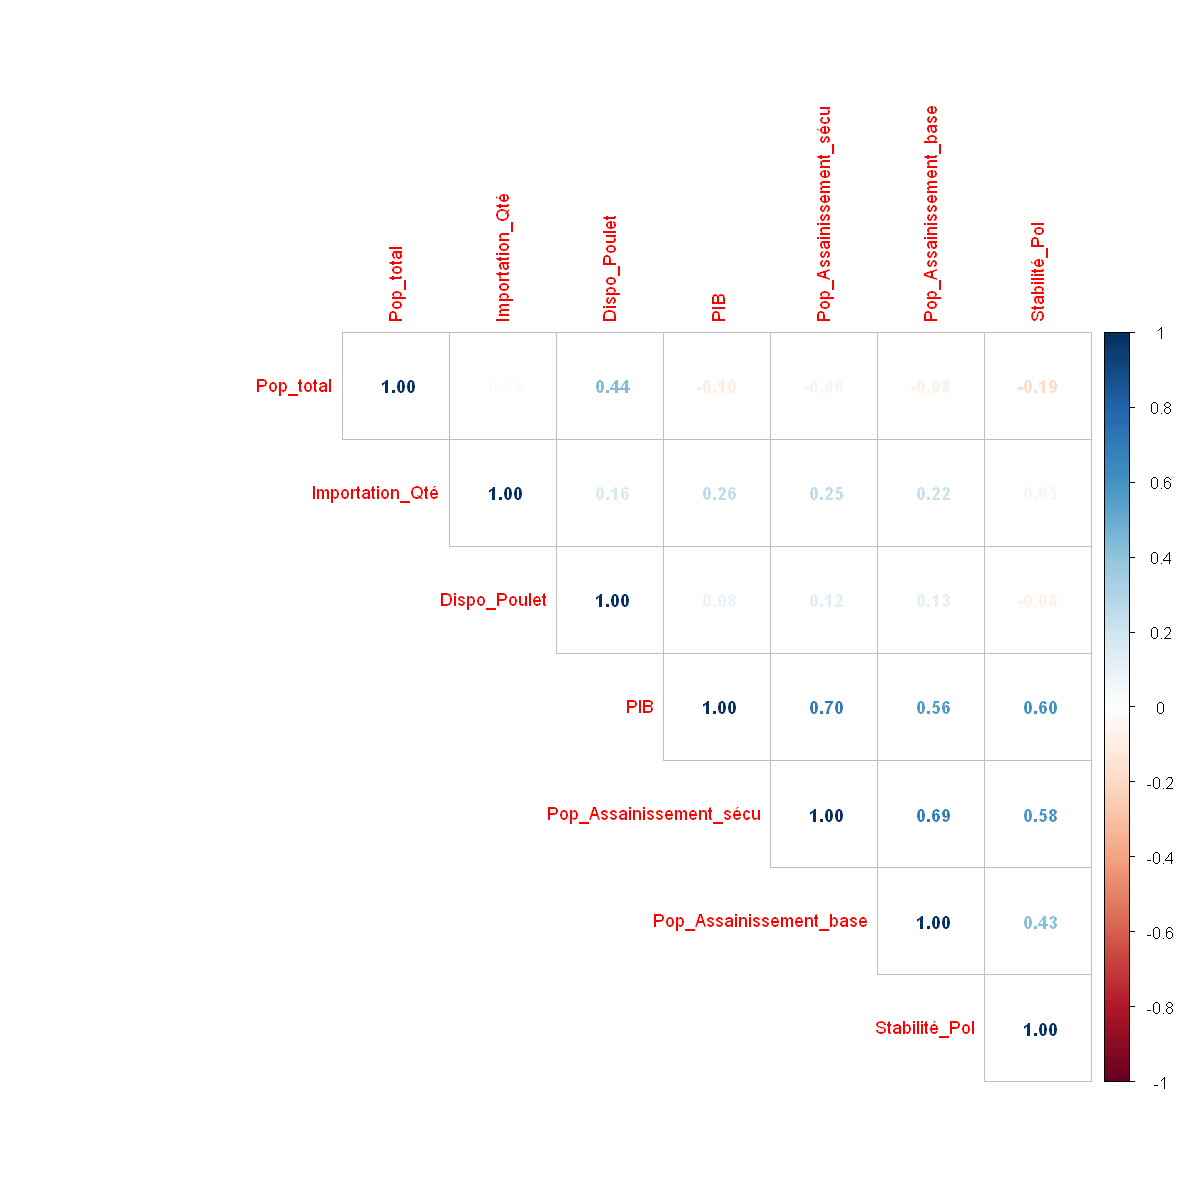

In [114]:
#visualisation de la corrélation après suppréssion colonnes
# ne prendre en compte que les valeurs numériques
Fichier_numérique3 <- select_if(Fichier_final, is.numeric)
head(Fichier_numérique3)

matrice.correlation3 <- cor(Fichier_numérique3)

#visualisation de la corrélation
corrplot(matrice.correlation3, method = "number", tl.cex=0.9,number.cex=0.9, type="upper")

### <span style="color:lightseagreen"> Sauvegarde des fichiers finaux </span>

In [115]:
# Sauvegarder le dataframe en tant que fichier CSV
write.csv(Fichier_final, file = "../Data/Data_5_ans/Fichier_final.csv")
write.csv(Fichier_numérique3, file = "../Data/Data_5_ans/Fichier_numérique3.csv")


In [116]:
Fichier_final

Zone,Pop_total,Importation_Qté,Dispo_Poulet,PIB,Pop_Assainissement_sécu,Pop_Assainissement_base,Stabilité_Pol
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Albanie,2870362,23050.38,32180.28,13248.75,47.45,98.88,0.24
Algérie,42679711,5.62,263055.24,11406.38,17.95,86.22,-0.92
Allemagne,83081350,482983.66,919105.15,52977.78,97.07,99.00,0.60
Arabie saoudite,35397224,640715.39,1329242.95,46571.40,57.25,99.00,-0.63
Arménie,2821132,35786.65,44138.53,12775.98,66.95,93.75,-0.51
Australie,25303574,2151.42,1171442.17,48853.85,72.83,99.00,0.91
Autriche,8869561,46427.78,108184.36,54280.68,99.00,99.00,0.93
Azerbaïdjan,10210957,27058.24,132308.81,14257.67,21.90,96.10,-0.72
Bahreïn,1475819,56233.44,66754.62,45236.30,90.30,99.00,-0.76
